In [8]:
import gym
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [9]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import numpy as np 
from numpy import abs as Abs
from numpy import sign as sign

from control.matlab import *  # MATLAB-like functions
import control as ct
from scipy import signal
 
 
import matplotlib
import matplotlib.pyplot as plt
 
import tensorflow as tf
from gym import Env
from gym.spaces import Discrete, Box
 
import random
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
# Quarter car model
M = 600  # Body mass (in Kg)
m = 75  # Mass of tyre (in Kg)
Ks = 30  # Spring constant
Kt = 300  # Spring constant of wheel
Cs = 400  # Damping coefficient
n = 2  # DOF
r = 1  # No of Actuator

# MR Damper
V = 20
K1 = 542.18
K2 = 550.16
C1 = 999.4
C2 = 3387.5
alpha  = 3846.2 
beta = 126.84
gamma = 303.83 
A1 = 96.067
N = 3

# State space representation (states - y1, y2, dot(y1), dot(y2)) 
# Continous time
A =np.array([[0 ,0 ,1 ,0 ],
              [0 ,0 ,0 ,1 ],
              [-Ks/M, Ks/M, 0, 0],
              [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
# Input matrix (Control force and Earthquake input)
B  = np.array([[0,0,1/M,-1/m]]).T
# Influence vector (Earthquake input)
E = np.array([[0,0,0,Kt/m]]).T 
# Output matrix (Disp + Accel)
Cd = np.array([[1, 1, 0, 0], [-Ks/M, Ks/M, 0, 0], [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
Dd = np.array([[0, 1/M, -1/m]]).T
Ed = np.array([[0, 0, 0]]).T

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\2648867625.py:28: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\2648867625.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


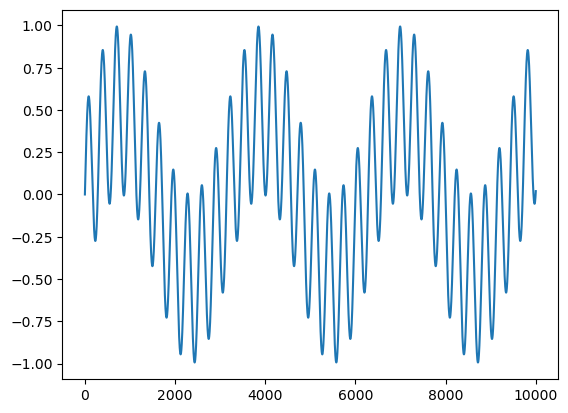

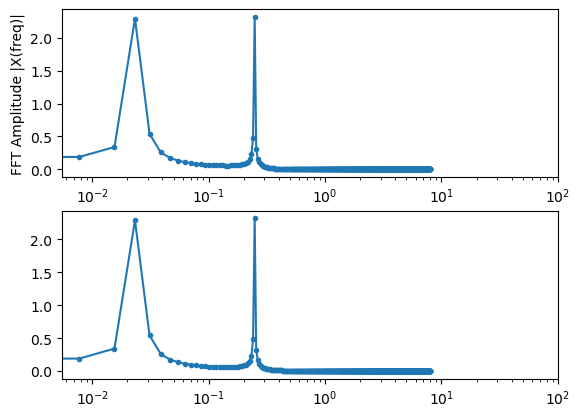

(1025, 2)
None


In [4]:
# Input Sinusoid
T = 100
dt = 0.01
t = np.arange(0, T+dt, dt)
omega1 = 2
omega2 = 0.2
amplitude_s   = 0.5*(np.sin(omega1*t) + np.sin(omega2*t))
plt.plot(amplitude_s)
# Perform FFT
sr = 1/dt  # sampling frequency
N1 = 2048  # Number of samples
fstep = sr/N1  # freq interval
f = np.linspace(0, (N1-1)*fstep, N1)

X = np.fft.fft(amplitude_s)
X_mag = np.abs(X)/N1

f_plot = f[0:int(N1/2+1)]/(2 * np.pi)
X_mag_plot = 2*X_mag[0:int(N1/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
ax1.plot(f_plot, X_mag_plot, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel('Freq (Hz)')
ax1.set_ylabel('FFT Amplitude |X(freq)|')
ax1.semilogx()
ax2.semilogx()
ax1.set_xlim(0, 100)
ax2.set_xlim(0, 100)
plt.show()

input = np.array([f_plot, X_mag_plot])
print(input.T.shape)
result=np.savetxt('FFT_s.txt', input.T, delimiter=' ')
print(result)

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


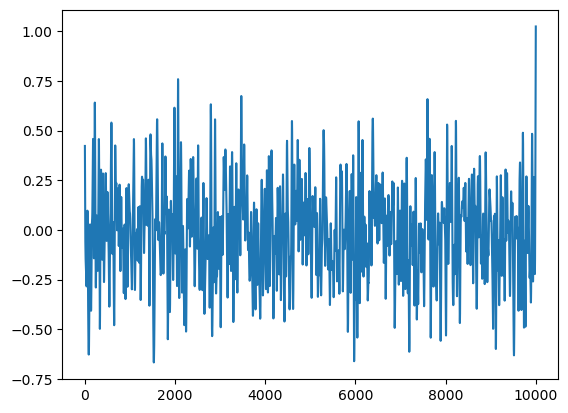

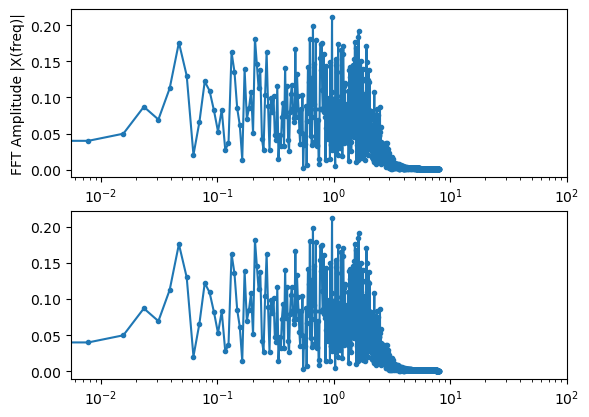

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


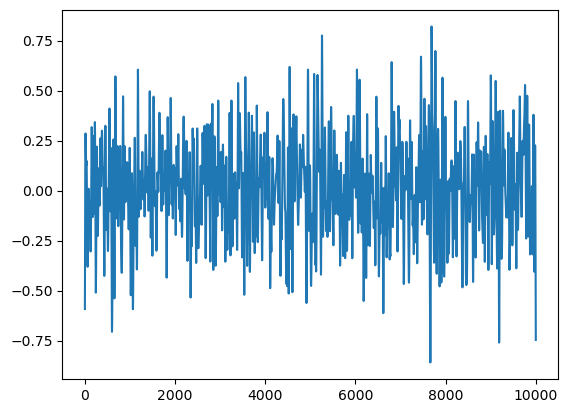

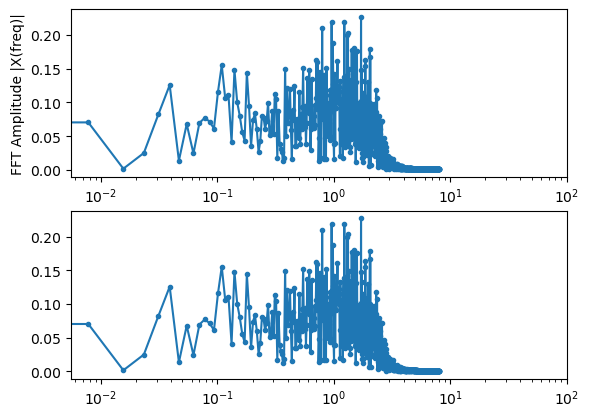

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


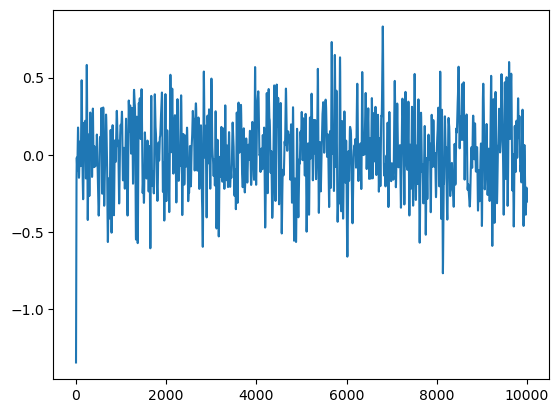

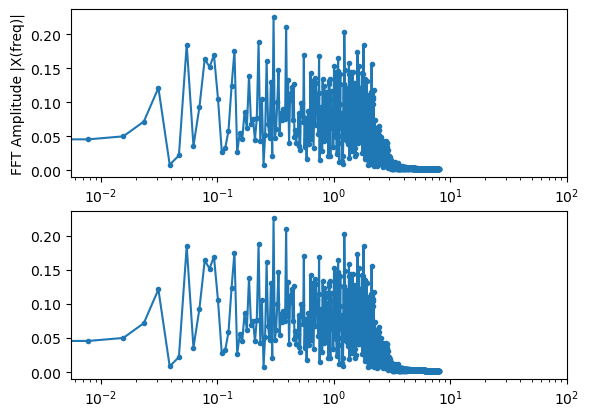

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


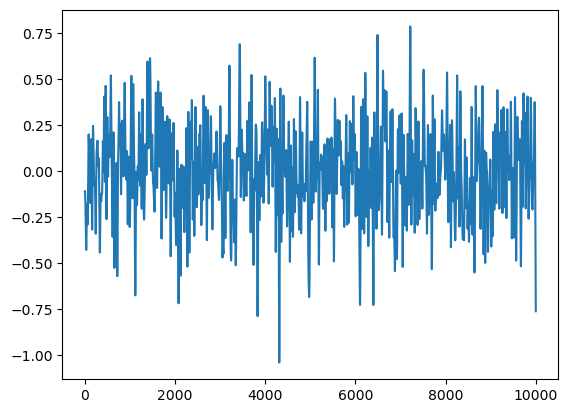

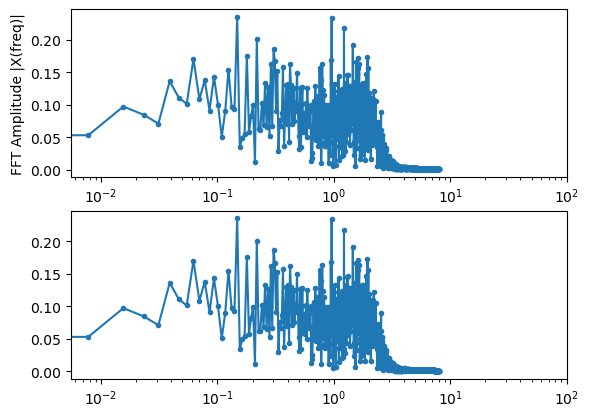

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


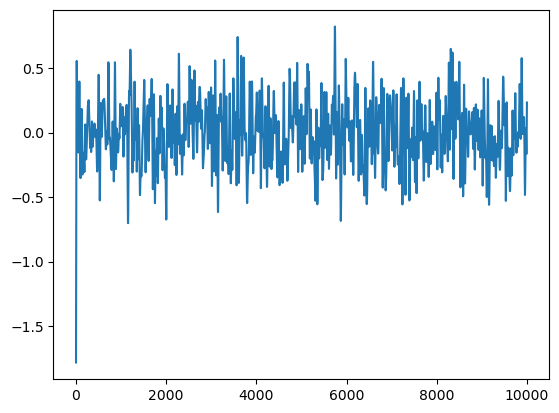

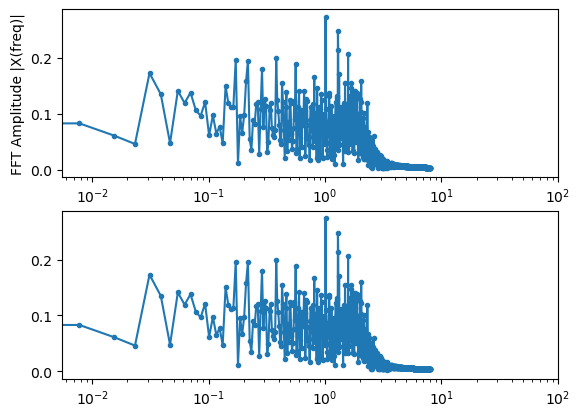

C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_xlim(0, 100)
C:\Users\USER\AppData\Local\Temp\ipykernel_7608\102417343.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax2.set_xlim(0, 100)


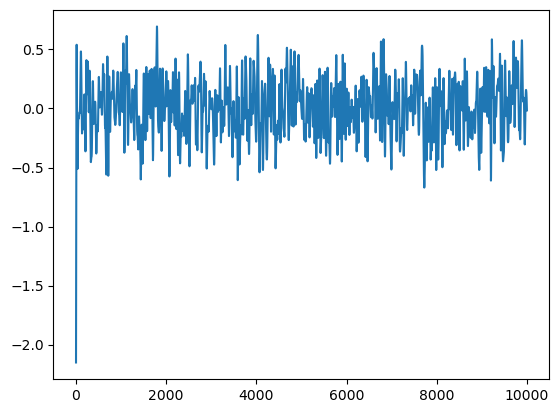

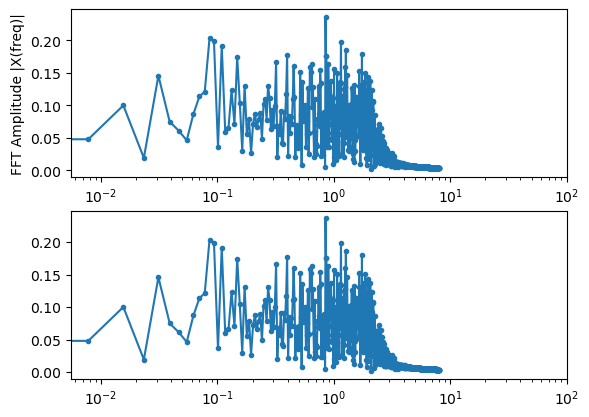

[[85494.79291212]
 [16899.60693008]
 [20857.95840185]
 [72555.03769983]
 [54654.32437254]
 [30647.3047301 ]] [[4072.0447731 ]
 [2002.56250562]
 [3655.91610483]
 [4438.11830441]
 [3727.64181953]
 [3581.78368424]]


In [5]:
Qp = np.array([[Ks, -Ks, 0, 0],
               [-Ks, Ks+Kt, 0, 0],
               [0, 0, M, 0],
               [0, 0, 0, m]])
# print(Qp)
(i,j)=B.shape
Rp =  (10**(0))*np.identity(j)
Kp1, Sp1, ep1 = ct.lqr(A, B, Qp, Rp)
del i, j

T = 50
dt = 0.01

nt = len(t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
U = np.zeros([nt, 6])

Fs = 100      # Sampling rate (Hz)
T = 100        # Duration (seconds)
dt = 0.01
# Generate a random signal with a mean of 0 and standard deviation of 1
t = np.arange(0, T+dt, dt)
# Input Sinusoid (Resonant Frequencies)
k = 0
for i in range(1, 3):
    for j in range(0, 3):
        omega1 = i
        omega2 = j/10
        x = np.random.normal(0, 1, size=len(t))

        # Define the filter parameters
        fc = 3       # Cutoff frequency (Hz)
        order = 4    # Filter order

        # Design the Butterworth filter
        nyquist_rate = 0.5 * 1/dt
        cutoff_freq = fc / nyquist_rate
        b, a = butter(order, cutoff_freq, 'low')

        # Apply the filter to the signal
        y = filtfilt(b, a, x)
        amplitude = y
        plt.plot(amplitude)
        
        # FFT
        sr = 1/dt  # sampling frequency
        N1 = 2048  # Number of samples
        fstep = sr/N1  # freq interval
        f = np.linspace(0, (N1-1)*fstep, N1)

        # Perform FFT
        X = np.fft.fft(amplitude)
        X_mag = np.abs(X)/N1
        
        f_plot = f[0:int(N1/2+1)]/(2 * np.pi)
        X_mag_plot = 2*X_mag[0:int(N1/2+1)]
        X_mag_plot[0] = X_mag_plot[0] / 2
        fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
        ax1.plot(f_plot, X_mag_plot, '.-')
        ax2.plot(f_plot, X_mag_plot, '.-')
        ax1.set_xlabel('Freq (Hz)')
        ax1.set_ylabel('FFT Amplitude |X(freq)|')
        ax1.semilogx()
        ax2.semilogx()
        ax1.set_xlim(0, 100)
        ax2.set_xlim(0, 100)
        plt.show()

        # Openloop
        sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
        t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
        x_uc[:, :, k] = x1
        y_uc[:, :, k] = y1[:, 1:3]
        del t1, y1, x1

        sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
        t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
        x_c[:, :, k] = x2
        y_c[:, :, k] = y2[:, 1:3]
        del t2, y2, x2
        k = k+1
del i, j, k
for k in range(0, 6):
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_uc[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
print(J1_val, J2_val)

In [6]:
input = np.array([f_plot, X_mag_plot])
print(input.T.shape)
result=np.savetxt('FFT.txt', input.T, delimiter=' ')
print(result)

(1025, 2)
None


In [7]:
input = np.array([t, amplitude])
print(input.T.shape)
result=np.savetxt('amplitude.txt', input.T, delimiter=' ')
print(result)

(10001, 2)
None


In [8]:
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.size'] = 24

# figure1=plt.figure(figsize = (12, 2))
# plt.plot(t, amplitude, label0 = "Average Reward")
# plt.axhline(y= 0.5, color='r', linestyle='-.')
# plt.ylabel('PIP', fontweight='bold');
# plt.title('Enter Here', fontweight='bold',fontsize=24)
# plt.grid(True);  
# plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
# figure1.savefig('Reward_8Story.pdf',format='pdf',dpi=600,bbox_inches='tight')

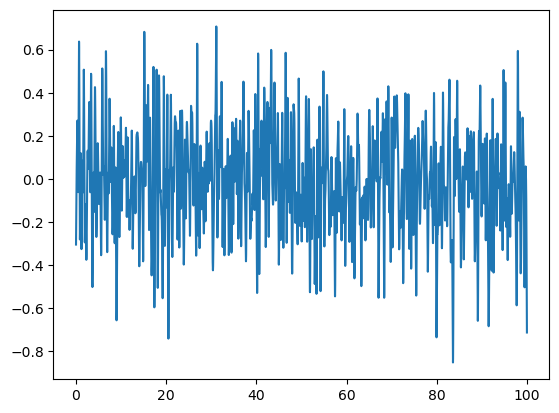

In [9]:
plt.plot(t, amplitude)

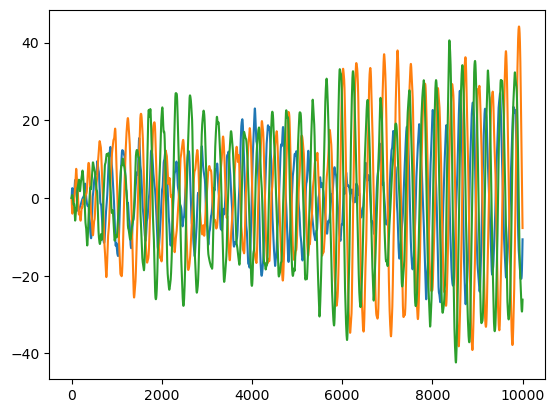

In [10]:
 plt.plot(U[:, 3:6])

In [11]:
class MrDamperEnv(Env):

    def __init__(self):
      self.Ad = 0.45 
      self.V = 20
      self.M = 600
      self.m = 75
      self.Ks = 30
      self.Cs = 400
      self.Kt = 300
      self.K1 = 542.18
      self.K2 = 550.16
      self.C1  =999.4 
      self.C2  = 3387.5 
      self.A1 = 96.067
      self.N = 3
      self.values =  [[],[],[],[]] 
      self.action = np.array([])
      self.chooser = np.random.randint(low=1,high=5)
      #self.file = "la"+"%02d" % self.chooser + ".dat"     #la45
      #self.amplitude   = 0.1*np.array(np.loadtxt(self.file)).flatten()
      # Input Road Profile (Trial input)
      self.T = 40
      self.dt = 0.01
      self.t = np.arange(0, self.T+self.dt, self.dt)
      #self.omega1 = np.random.randint(low=1,high=3)
      #self.omega2 = np.random.randint(low=0,high=3)
      self.x_uf = np.random.normal(0, 1, size=len(self.t))
      self.fc = 3       # Cutoff frequency (Hz)
      self.order = 4    # Filter order

      # Design the Butterworth filter
      self.nyquist_rate = 0.5 * 1/self.dt
      self.cutoff_freq = self.fc / self.nyquist_rate
      self.b, self.a = butter(self.order, self.cutoff_freq, 'low')
      self.amplitude = filtfilt(self.b, self.a, self.x_uf)
      self.state = np.array([[0,0,0,0]]) #y1,y1dot,y1dotdot,y2,y2dot
      # System Dynamics
      
    
      #dt =??
      #self.t = np.arange(0, self.T+self.dt, self.dt)
      self.time_current =  0
      self.E = 0 
      self.J = 0
      self.en = []
      self.hr = []
      self.J_val = 0
      self.action_space = Box(low=-100, high=100,shape=(1,)) 
      self.observation_space = Box(low=np.array([-100000,-100000,-100000,-100000 ]), high=np.array([100000,100000,100000,100000 ]) )
      self.statem = np.array([0,0,0,0])
      self.stateh = np.array([0,0,0,0,0])

    def step(self, action): 
           
          U = action
          self.en.append(U)
          Ad = self.Ad 
          V = self.V 
          M = self.M 
          m = self.m 
          Ks = self.Ks 
          Cs = self.Cs 
          Kt = self.Kt 
          K1 = self.K1
          K2 = self.K2 
          C1 = self.C1 
          C2 = self.C2 
          self.J = 0
          xns =  np.array([[0,0,0,0]])
          #f1 = []
          z =  20+self.time_current
          A1 = self.A1
          N = self.N
          self.rewardlist = np.array([])
          self.action = np.append(self.action,action) 
          dt = self.dt
          i = 0
          for tkk in range(self.time_current,z):
            h = self.amplitude[tkk] 
            self.hr.append(h)
            xn = np.array([[self.state[0][0], self.state[0][1], self.state[0][2], self.state[0][3]]]).T
            A = np.array([[0 ,0 ,1 ,0 ],
                        [0 ,0 ,0 ,1 ],
                        [-self.Ks/self.M, self.Ks/self.M, 0, 0],
                        [self.Ks/self.m, -1*(self.Ks+self.Kt)/self.m, 0, 0]])
            Bu  = U*np.array([[0,0,1/self.M,-1/self.m]]).T
            f = h*((np.array([[0,0,0,self.Kt/self.m]])).transpose()) 
            D = f + Bu
            k1 = self.dt*((A)@xn + D)
            k2 = self.dt*(A@(xn + 0.5*k1)+ D)
            k3 = self.dt*(A@(xn + 0.5*k2)+ D)
            k4 = self.dt*(A@(xn + k3)+ D)
            xn1 = xn + (k1 + 2*k2 + 2*k3 + k4)/6
            xn11 = np.array([[xn1[0][0],xn1[1][0],xn1[2][0],xn1[3][0]]])
            #f1.append(xn1[0][0])  
            self.state = xn11
            Q = np.array([[Ks, -Ks, 0, 0],
                  [-Ks, Ks+Kt, 0, 0],
                  [0, 0, M, 0],
                  [0, 0, 0, m]])
            
            self.E = 0.5*((xn11@Q)@xn11.T) 
            #print(self.E)
            self.J = self.J + dt*(0.9**i)*(self.E[0][0])
            if(i==0):
              
              self.statem = np.array([xn1[0][0],xn1[1][0],xn1[2][0],xn1[3][0]])
              self.stateh = np.array([h,xn1[0][0],xn1[1][0],xn1[2][0],xn1[3][0]])
              xns = np.array([[xn1[0][0],xn1[1][0],xn1[2][0],xn1[3][0]]])
              self.J_val += self.J 
            i = i+1
          #print("kkk ",self.J_val)
          #print(self.J) 
          done = False
          #print(f1)
          info = {}   
          reward = -1*self.J
          self.state = xns
          self.values[0].append(self.statem[0])  
          self.values[1].append(self.statem[1])
          self.values[2].append(self.statem[2])
          self.values[3].append(self.statem[3])
        
        
          
          return self.statem, reward, done, info

    def reset(self):
      self.Ad = 0.45 
      self.V = 20
      self.M = 600
      self.m = 75
      self.Ks = 30
      self.Cs = 400
      self.Kt = 300
      self.K1 = 542.18
      self.K2 = 550.16
      self.C1  =999.4 
      self.C2  = 3387.5 
      self.A1 = 96.067
      self.N = 3
      self.values =  [[],[],[],[]] 
      self.action = np.array([])
      self.chooser = np.random.randint(low=1,high=5)
      #self.file = "la"+"%02d" % self.chooser + ".dat"     #la45
      #self.amplitude   = 0.1*np.array(np.loadtxt(self.file)).flatten()
    # Input Road Profile (Trial input)
      self.T = 40
      self.dt = 0.01
      self.t = np.arange(0, self.T+self.dt, self.dt)
      #self.omega1 = np.random.randint(low=1,high=3)
      #self.omega2 = np.random.randint(low=0,high=3)
      self.x_uf = np.random.normal(0, 1, size=len(self.t))
      self.fc = 3       # Cutoff frequency (Hz)
      self.order = 4    # Filter order

        # Design the Butterworth filter
      self.nyquist_rate = 0.5 * 1/self.dt
      self.cutoff_freq = self.fc / self.nyquist_rate
      self.b, self.a = butter(self.order, self.cutoff_freq, 'low')
      self.amplitude = filtfilt(self.b, self.a, self.x_uf)
      self.state = np.array([[0,0,0,0]]) #y1,y1dot,y1dotdot,y2,y2dot
      # System Dynamics
      

      #dt =??
      #self.t = np.arange(0, self.T+self.dt, self.dt)
      self.time_current =  0
      self.E = 0 
      self.J = 0
      self.en = []
      self.hr = []
      self.J_val = 0
      self.action_space = Box(low=-100, high=100,shape=(1,)) 
      self.observation_space = Box(low=np.array([-100000,-100000,-100000,-100000 ]), high=np.array([100000,100000,100000,100000 ]) )
      self.statem = np.array([0,0,0,0])
      self.stateh = np.array([0,0,0,0,0])
      A =np.array([[0 ,0 ,1 ,0 ],
                   [0 ,0 ,0 ,1 ],
                   [-Ks/M, Ks/M, 0, 0],
                   [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
      # Input matrix (Control force and Earthquake input)
      B  = np.array([[0,0,1/M,-1/m]]).T
      # Influence vector (Earthquake input)
      E = np.array([[0,0,0,Kt/m]]).T
      # Output matrix (Disp + Accel)
      Cd = np.array([[1, 1, 0, 0], [-Ks/M, Ks/M, 0, 0], [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
      Dd = np.array([[0, 1/M, -1/m]]).T
      Ed = np.array([[0, 0, 0]]).T
      x_uc = np.zeros([len(self.t), 2*n])
      y_uc = np.zeros([len(self.t), n])
      x_c = np.zeros([len(self.t), 2*n])
      y_c = np.zeros([len(self.t), n])
      J1_val = np.zeros([1, 1])
      J2_val = np.zeros([1, 1])
      U = np.zeros([len(self.t), 1])
      # Openloop
      sys_uc = signal.StateSpace(A, E, Cd, Ed)
      t1,y1,x1 = signal.lsim(sys_uc,self.amplitude,self.t)
      x_uc[:, :] = x1
      y_uc[:, :] = y1[:, 1:3]
      del t1, y1, x1
      # LQR
      Qp = np.array([[Ks, -Ks, 0, 0],
                     [-Ks, Ks+Kt, 0, 0],
                     [0, 0, M, 0],
                     [0, 0, 0, m]])
      # print(Qp)
      (i,j)=B.shape
      Rp =  (10**(0))*np.identity(j)
      Kp1, Sp1, ep1 = ct.lqr(A, B, Qp, Rp)
      del i, j

      sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, Ed)
      t2,y2,x2 = signal.lsim(sys_c,self.amplitude,self.t)
      x_c[:, :] = x2
      y_c[:, :] = y2[:, 1:3]
      del t2, y2, x2

      for tkk in range(0,len(self.t)):
            U[tkk, :] = Kp1@x_uc[tkk,:].T
            En1 = 0.5*((x_uc[tkk,:]@Qp)@x_uc[tkk,:].T)
            En2 = 0.5*((x_c[tkk,:]@Qp)@x_c[tkk,:].T)
            J1 = self.dt*En1
            J2 = self.dt*En2
            J1_val[:,:] += J1
            J2_val[:,:] += J2
      print(J1_val, J2_val)
      del A, B, Kp1, Cd, Dd, Ed, Qp, Rp, tkk
      return self.statem


env = MrDamperEnv()

states = env.observation_space.shape
actions = env.action_space

C:\Users\USER\anaconda3\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [12]:
states = env.observation_space.shape
num_states = states[0]
print("Size of State Space ->  {}".format(num_states))
actions = env.action_space.shape
num_actions = actions[0]
print("Size of Action Space ->  {}".format(num_actions))
upper_bound = env.action_space.high[0]
lower_bound = env.action_space.low[0]
print("Max Value of Action ->  {}".format(upper_bound))
print("Min Value of Action ->  {}".format(lower_bound))

Size of State Space ->  4
Size of Action Space ->  1
Max Value of Action ->  100.0
Min Value of Action ->  -100.0


In [13]:
env.action_space.sample()

array([11.875708], dtype=float32)

In [14]:
env.observation_space.sample()

array([ 27867.871,  62086.27 , -45387.29 , -70945.35 ], dtype=float32)

In [15]:
 class OUActionNoise:
    def __init__(self, mean, std_deviation, theta=0.15, dt=1e-2, x_initial=None):
        self.theta = theta
        self.mean = mean
        self.std_dev = std_deviation
        self.dt = dt
        self.x_initial = x_initial
        self.reset()

    def __call__(self):
        # Formula taken from https://www.wikipedia.org/wiki/Ornstein-Uhlenbeck_process.
        x = ( self.x_prev+ self.theta * (self.mean - self.x_prev) * self.dt + self.std_dev * np.sqrt(self.dt) * np.random.normal(size=self.mean.shape))
        # Store x into x_prev
        # Makes next noise dependent on current one
        self.x_prev = x
        return x

    def reset(self):
        if self.x_initial is not None:
            self.x_prev = self.x_initial
        else:
            self.x_prev = np.zeros_like(self.mean)

In [16]:
 class Buffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        
        # Number of "experiences" to store at max
        self.buffer_capacity = buffer_capacity
        # Num of tuples to train on.
        self.batch_size = batch_size
        
        # Its tells us num of times record() was called.
        self.buffer_counter = 0
        
        # Instead of list of tuples as the exp.replay concept go
        # We use different np.arrays for each tuple element
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, num_actions))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))
    
    # Takes (s,a,r,s') obervation tuple as input
    def record(self, obs_tuple):
      
        index = self.buffer_counter % self.buffer_capacity

        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]

        self.buffer_counter += 1


    @tf.function
    def update(
        self, state_batch, action_batch, reward_batch, next_state_batch,
    ):
        
        with tf.GradientTape() as tape:
            target_actions = target_actor(next_state_batch, training=True)
            y = reward_batch + gamma * target_critic(
                [next_state_batch, target_actions], training=True
            )
            critic_value = critic_model([state_batch, action_batch], training=True)
            critic_loss = tf.math.reduce_mean(tf.math.square(y - critic_value))

        critic_grad = tape.gradient(critic_loss, critic_model.trainable_variables)
        critic_optimizer.apply_gradients(
            zip(critic_grad, critic_model.trainable_variables)
        )

        with tf.GradientTape() as tape:
            actions = actor_model(state_batch, training=True)
            critic_value = critic_model([state_batch, actions], training=True)
            actor_loss = -tf.math.reduce_mean(critic_value)

        actor_grad = tape.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(
            zip(actor_grad, actor_model.trainable_variables)
        )

    def learn(self):
        
        record_range = min(self.buffer_counter, self.buffer_capacity)
       
        batch_indices = np.random.choice(record_range, self.batch_size)
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        reward_batch = tf.cast(reward_batch, dtype=tf.float32)
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])

        self.update(state_batch, action_batch, reward_batch, next_state_batch)


@tf.function
def update_target(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

In [17]:
 def get_actor():
    last_init = tf.random_uniform_initializer(minval=-0.003, maxval=0.003)
    inputs = layers.Input(shape=(num_states,))
    out = layers.Dense(256, activation="relu")(inputs)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1, activation="tanh", kernel_initializer=last_init)(out)
    outputs = outputs * upper_bound
    model = tf.keras.Model(inputs, outputs)
    return model


def get_critic():
    # State as input
    state_input = layers.Input(shape=(num_states))
    state_out = layers.Dense(16, activation="relu")(state_input)
    state_out = layers.Dense(32, activation="relu")(state_out)

    # Action as input
    action_input = layers.Input(shape=(num_actions))
    action_out = layers.Dense(32, activation="relu")(action_input)
    concat = layers.Concatenate()([state_out, action_out])

    out = layers.Dense(256, activation="relu")(concat)
    out = layers.Dense(256, activation="relu")(out)
    outputs = layers.Dense(1)(out)
    model = tf.keras.Model([state_input, action_input], outputs)

    return model

In [18]:
 def policy(state, noise_object):
    sampled_actions = tf.squeeze(actor_model(state))
    noise = noise_object()
    sampled_actions = sampled_actions.numpy() + noise
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

In [19]:
std_dev = 0.2
ou_noise = OUActionNoise(mean=np.zeros(1), std_deviation=float(std_dev) * np.ones(1))

actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

target_actor.set_weights(actor_model.get_weights())
target_critic.set_weights(critic_model.get_weights())

critic_lr = 0.001
actor_lr = 0.001

critic_optimizer = tf.keras.optimizers.Adam(critic_lr)
actor_optimizer = tf.keras.optimizers.Adam(actor_lr)

total_episodes = 1000
gamma = 0.01
tau = 0.9

buffer = Buffer(100000, 64)

[[1366.72419316]] [[562.50023587]]
Episode * 0 * Reward is ==> -13001.481162844662
Episode * 0 * J_value is ==> 1474.261937821451
[[1122.28545764]] [[539.26284092]]
Episode * 1 * Reward is ==> -14264.57193352456
Episode * 1 * J_value is ==> 1622.7796422140277
[[7348.37773002]] [[1852.94772003]]
Episode * 2 * Reward is ==> -97221.75970170354
Episode * 2 * J_value is ==> 11050.507011574964
[[17329.61109112]] [[2527.67347355]]
Episode * 3 * Reward is ==> -121842.68837101759
Episode * 3 * J_value is ==> 13853.829679375352
[[2767.97830392]] [[1002.98178387]]
Episode * 4 * Reward is ==> -19628.88787572717
Episode * 4 * J_value is ==> 2230.178699598513
[[1183.35341366]] [[792.5718052]]
Episode * 5 * Reward is ==> -9939.797566523215
Episode * 5 * J_value is ==> 1128.0885446015056
[[1451.07136776]] [[741.50037918]]
Episode * 6 * Reward is ==> -21518.059499049275
Episode * 6 * J_value is ==> 2446.061335788492
[[4575.22336783]] [[1596.82032941]]
Episode * 7 * Reward is ==> -49239.553804792195
Epi

Episode * 62 * Reward is ==> -11583.457532751418
Episode * 62 * J_value is ==> 1313.9924346213963
[[1884.87689785]] [[987.05360779]]
Episode * 63 * Reward is ==> -10843.634508356885
Episode * 63 * J_value is ==> 1232.3290359513705
[[4831.38185301]] [[936.37266264]]
Episode * 64 * Reward is ==> -8679.899470709255
Episode * 64 * J_value is ==> 985.8552899581736
[[1549.41059445]] [[1209.14664264]]
Episode * 65 * Reward is ==> -9754.360396691918
Episode * 65 * J_value is ==> 1108.0514093849217
[[15295.10438504]] [[2766.12591719]]
Episode * 66 * Reward is ==> -10133.528124321345
Episode * 66 * J_value is ==> 1149.4578910863352
[[2073.96669699]] [[867.20149219]]
Episode * 67 * Reward is ==> -8665.527182833683
Episode * 67 * J_value is ==> 984.6357961875044
[[6149.51447146]] [[1189.19977829]]
Episode * 68 * Reward is ==> -10599.855473447158
Episode * 68 * J_value is ==> 1203.8359041724484
[[7471.2501461]] [[1724.51419127]]
Episode * 69 * Reward is ==> -10123.054400771094
Episode * 69 * J_valu

Episode * 124 * Reward is ==> -5345.260304388416
Episode * 124 * J_value is ==> 606.8385332145359
[[3794.92682048]] [[864.45411927]]
Episode * 125 * Reward is ==> -5200.540721600082
Episode * 125 * J_value is ==> 591.4285035877324
[[5236.52839791]] [[1685.34342679]]
Episode * 126 * Reward is ==> -5588.963502360904
Episode * 126 * J_value is ==> 634.9794475263243
[[9797.62588024]] [[1814.8377531]]
Episode * 127 * Reward is ==> -4817.05901485283
Episode * 127 * J_value is ==> 546.6925359854098
[[2687.45717867]] [[974.40167896]]
Episode * 128 * Reward is ==> -4678.347530158796
Episode * 128 * J_value is ==> 531.1569839283046
[[3619.99840891]] [[787.24832806]]
Episode * 129 * Reward is ==> -4619.3812483511565
Episode * 129 * J_value is ==> 524.7614897957966
[[3651.14895421]] [[1182.70200747]]
Episode * 130 * Reward is ==> -6377.073675400809
Episode * 130 * J_value is ==> 722.4250601344089
[[2736.60224822]] [[892.45463318]]
Episode * 131 * Reward is ==> -5364.911939256413
Episode * 131 * J_

Episode * 186 * Reward is ==> -3382.849791038136
Episode * 186 * J_value is ==> 382.53962006246337
[[6637.89349615]] [[1802.9474802]]
Episode * 187 * Reward is ==> -3169.416686818586
Episode * 187 * J_value is ==> 360.0708594388487
[[4343.26560434]] [[771.04944155]]
Episode * 188 * Reward is ==> -3586.126709730117
Episode * 188 * J_value is ==> 405.8953315574671
[[806.97018186]] [[453.63174276]]
Episode * 189 * Reward is ==> -4528.844333297841
Episode * 189 * J_value is ==> 514.4720092332733
[[1931.91562177]] [[985.80843948]]
Episode * 190 * Reward is ==> -4542.021840517075
Episode * 190 * J_value is ==> 515.8082216957541
[[4503.89406769]] [[1161.60662994]]
Episode * 191 * Reward is ==> -8477.335500563448
Episode * 191 * J_value is ==> 964.6973102422664
[[11465.62982584]] [[1937.14843598]]
Episode * 192 * Reward is ==> -4840.255904081713
Episode * 192 * J_value is ==> 549.2985729712761
[[7529.04218367]] [[1629.3269221]]
Episode * 193 * Reward is ==> -3431.78899020742
Episode * 193 * J_

Episode * 248 * Reward is ==> -2279.350359998916
Episode * 248 * J_value is ==> 257.8461852556545
[[3033.0536048]] [[944.92287375]]
Episode * 249 * Reward is ==> -14896.30045774408
Episode * 249 * J_value is ==> 1689.9445418896407
[[11935.21656384]] [[2265.51582066]]
Episode * 250 * Reward is ==> -3348.702646374539
Episode * 250 * J_value is ==> 378.531170897434
[[1668.7954469]] [[434.91919167]]
Episode * 251 * Reward is ==> -2722.880598623858
Episode * 251 * J_value is ==> 307.9727408124851
[[1240.9988851]] [[799.08046332]]
Episode * 252 * Reward is ==> -3839.6032289698496
Episode * 252 * J_value is ==> 435.08001670124975
[[11115.96648905]] [[2769.80281297]]
Episode * 253 * Reward is ==> -3640.378719513656
Episode * 253 * J_value is ==> 412.64486033753155
[[1340.86643737]] [[699.84769463]]
Episode * 254 * Reward is ==> -4190.7814341784815
Episode * 254 * J_value is ==> 475.84779082925513
[[12699.3365318]] [[3134.98456283]]
Episode * 255 * Reward is ==> -3817.7804654874926
Episode * 25

Episode * 310 * Reward is ==> -4007.213583430281
Episode * 310 * J_value is ==> 453.86918231757494
[[1900.20880573]] [[600.36055206]]
Episode * 311 * Reward is ==> -1779.5107602219032
Episode * 311 * J_value is ==> 200.3785190069521
[[1160.48146555]] [[630.02814322]]
Episode * 312 * Reward is ==> -3586.9143857657637
Episode * 312 * J_value is ==> 404.5422091618412
[[9781.80671185]] [[1790.13446723]]
Episode * 313 * Reward is ==> -4393.067252219808
Episode * 313 * J_value is ==> 496.7723660865564
[[1312.21684579]] [[594.77044416]]
Episode * 314 * Reward is ==> -2073.775960689994
Episode * 314 * J_value is ==> 232.81977855429557
[[1959.43908755]] [[724.44366364]]
Episode * 315 * Reward is ==> -5566.617513546908
Episode * 315 * J_value is ==> 630.3250465170755
[[5623.22921711]] [[1328.21524059]]
Episode * 316 * Reward is ==> -1885.7146109759055
Episode * 316 * J_value is ==> 212.12663684436276
[[10692.01630673]] [[2162.95195471]]
Episode * 317 * Reward is ==> -1373.918930362823
Episode * 

Episode * 371 * Reward is ==> -960.9511410291475
Episode * 371 * J_value is ==> 106.94959658630455
[[2945.82863289]] [[937.92594482]]
Episode * 372 * Reward is ==> -2765.4094423482106
Episode * 372 * J_value is ==> 312.7793600945959
[[1647.30479863]] [[847.74577147]]
Episode * 373 * Reward is ==> -2405.0816500341466
Episode * 373 * J_value is ==> 270.5249759109989
[[2917.14796974]] [[991.05899731]]
Episode * 374 * Reward is ==> -1531.4964809059031
Episode * 374 * J_value is ==> 172.6958171878969
[[6498.24925452]] [[1235.63051111]]
Episode * 375 * Reward is ==> -1814.2787489283614
Episode * 375 * J_value is ==> 205.0069141542966
[[1299.94250081]] [[449.95244079]]
Episode * 376 * Reward is ==> -3476.0954147663087
Episode * 376 * J_value is ==> 394.58263218310105
[[6410.5204473]] [[1323.5192032]]
Episode * 377 * Reward is ==> -2290.669621901769
Episode * 377 * J_value is ==> 259.2650693705097
[[5571.9535164]] [[1385.25152009]]
Episode * 378 * Reward is ==> -4400.793453064324
Episode * 378

Episode * 432 * Reward is ==> -4538.247101374375
Episode * 432 * J_value is ==> 513.7957600602077
[[5073.21118274]] [[1271.55171786]]
Episode * 433 * Reward is ==> -2048.0324707553923
Episode * 433 * J_value is ==> 228.36673456764956
[[1734.88900085]] [[623.73903648]]
Episode * 434 * Reward is ==> -4050.637963082015
Episode * 434 * J_value is ==> 458.5655164640506
[[2327.65769287]] [[893.41802131]]
Episode * 435 * Reward is ==> -3518.8212719313783
Episode * 435 * J_value is ==> 396.51614311603925
[[2725.23482615]] [[911.9931169]]
Episode * 436 * Reward is ==> -3033.369461008308
Episode * 436 * J_value is ==> 342.9374825052637
[[4185.21361967]] [[1216.42540967]]
Episode * 437 * Reward is ==> -4055.96975711879
Episode * 437 * J_value is ==> 459.6230203402557
[[4528.9494878]] [[1144.76511978]]
Episode * 438 * Reward is ==> -3334.2842424255577
Episode * 438 * J_value is ==> 377.6505891728254
[[1563.87598601]] [[834.98707012]]
Episode * 439 * Reward is ==> -2108.614899649065
Episode * 439 *

Episode * 494 * Reward is ==> -2235.2458221155584
Episode * 494 * J_value is ==> 251.6852825998088
[[3009.86920763]] [[1527.56908489]]
Episode * 495 * Reward is ==> -2302.8924972937943
Episode * 495 * J_value is ==> 260.09235479030355
[[3309.59187039]] [[1082.55802902]]
Episode * 496 * Reward is ==> -2273.427971729956
Episode * 496 * J_value is ==> 257.15156811544864
[[3785.84535017]] [[1040.20866716]]
Episode * 497 * Reward is ==> -1540.1043956309668
Episode * 497 * J_value is ==> 172.72830119118467
[[7463.29533979]] [[1577.00185805]]
Episode * 498 * Reward is ==> -3159.403447766059
Episode * 498 * J_value is ==> 357.0375994065375
[[1671.93639157]] [[1068.2576952]]
Episode * 499 * Reward is ==> -1694.728376008054
Episode * 499 * J_value is ==> 190.90202955981243
[[5169.2299096]] [[1089.18788111]]
Episode * 500 * Reward is ==> -2038.7911877024972
Episode * 500 * J_value is ==> 230.16097736591234
[[1943.28724403]] [[552.61395434]]
Episode * 501 * Reward is ==> -2664.365521469267
Episode

Episode * 555 * Reward is ==> -3087.1209163700973
Episode * 555 * J_value is ==> 349.9400394697745
[[17157.10525409]] [[2963.61899818]]
Episode * 556 * Reward is ==> -3151.9524644809812
Episode * 556 * J_value is ==> 356.1319045656341
[[3651.76380262]] [[1038.1090451]]
Episode * 557 * Reward is ==> -3926.150938793401
Episode * 557 * J_value is ==> 444.64149195279975
[[1943.41648432]] [[772.73851154]]
Episode * 558 * Reward is ==> -2073.423578407266
Episode * 558 * J_value is ==> 232.2511299508083
[[6060.68611204]] [[2187.65156069]]
Episode * 559 * Reward is ==> -1722.235095325152
Episode * 559 * J_value is ==> 193.64848693384093
[[18454.65421489]] [[3011.79939515]]
Episode * 560 * Reward is ==> -2340.1296934365982
Episode * 560 * J_value is ==> 264.4786754823414
[[3455.07151134]] [[1385.22870137]]
Episode * 561 * Reward is ==> -3331.316812393047
Episode * 561 * J_value is ==> 376.7991301999193
[[656.10370877]] [[404.57338075]]
Episode * 562 * Reward is ==> -3480.6611687464697
Episode *

Episode * 616 * Reward is ==> -1956.8352309999925
Episode * 616 * J_value is ==> 220.4353981040627
[[2414.29880325]] [[872.26989227]]
Episode * 617 * Reward is ==> -3334.134948984684
Episode * 617 * J_value is ==> 378.20650626721755
[[8634.54827886]] [[1793.49728643]]
Episode * 618 * Reward is ==> -2837.208843634988
Episode * 618 * J_value is ==> 321.0264466030769
[[7576.52757919]] [[1395.54709365]]
Episode * 619 * Reward is ==> -5791.922816387349
Episode * 619 * J_value is ==> 657.2062437135311
[[8306.72610142]] [[1373.53419915]]
Episode * 620 * Reward is ==> -6387.852335830151
Episode * 620 * J_value is ==> 723.9762043946766
[[1814.23533513]] [[781.12399415]]
Episode * 621 * Reward is ==> -3468.3525919301896
Episode * 621 * J_value is ==> 392.77714831942984
[[4853.21746292]] [[1438.96712757]]
Episode * 622 * Reward is ==> -4865.941465848473
Episode * 622 * J_value is ==> 550.8766702592916
[[2876.21835194]] [[990.36022908]]
Episode * 623 * Reward is ==> -1742.8234069865553
Episode * 6

Episode * 677 * Reward is ==> -3259.9187312165773
Episode * 677 * J_value is ==> 368.75339911460946
[[3762.33042998]] [[987.83383665]]
Episode * 678 * Reward is ==> -2628.0779963454215
Episode * 678 * J_value is ==> 297.6878105523258
[[2257.42880632]] [[662.92742976]]
Episode * 679 * Reward is ==> -3660.061608908827
Episode * 679 * J_value is ==> 414.2589667762297
[[3499.61633804]] [[708.29257188]]
Episode * 680 * Reward is ==> -3277.3363728466247
Episode * 680 * J_value is ==> 370.1622918741708
[[2408.70949369]] [[768.39671513]]
Episode * 681 * Reward is ==> -4203.609098057565
Episode * 681 * J_value is ==> 475.54158941054453
[[10158.17234693]] [[1745.59775134]]
Episode * 682 * Reward is ==> -2421.664114411088
Episode * 682 * J_value is ==> 273.84566658812696
[[9396.87465852]] [[1837.90065121]]
Episode * 683 * Reward is ==> -2896.5293304959227
Episode * 683 * J_value is ==> 327.3030894508503
[[3280.46083272]] [[956.21713464]]
Episode * 684 * Reward is ==> -2344.2947462853253
Episode *

Episode * 739 * Reward is ==> -3142.117460180646
Episode * 739 * J_value is ==> 355.05648706037186
[[8621.84811705]] [[1829.87762434]]
Episode * 740 * Reward is ==> -3186.7193819258487
Episode * 740 * J_value is ==> 360.4333705156995
[[1156.03485563]] [[847.74546651]]
Episode * 741 * Reward is ==> -1740.130050601498
Episode * 741 * J_value is ==> 196.2451839689754
[[6642.30825114]] [[1999.98301797]]
Episode * 742 * Reward is ==> -4465.60198534658
Episode * 742 * J_value is ==> 505.4575348857151
[[963.19856919]] [[505.17378117]]
Episode * 743 * Reward is ==> -2296.093090746053
Episode * 743 * J_value is ==> 258.76206340036117
[[1293.87960139]] [[797.16510861]]
Episode * 744 * Reward is ==> -2662.21946814989
Episode * 744 * J_value is ==> 301.2447431879674
[[7198.06728002]] [[1280.60417761]]
Episode * 745 * Reward is ==> -2044.8427004908192
Episode * 745 * J_value is ==> 231.2551259492778
[[1921.18828937]] [[552.90403643]]
Episode * 746 * Reward is ==> -4196.0802336482075
Episode * 746 *

Episode * 801 * Reward is ==> -2807.400912240991
Episode * 801 * J_value is ==> 317.55689026588385
[[2680.81209181]] [[696.20645946]]
Episode * 802 * Reward is ==> -3245.8290207682157
Episode * 802 * J_value is ==> 366.91372827415745
[[6004.17772452]] [[1504.58452049]]
Episode * 803 * Reward is ==> -2485.8633945521415
Episode * 803 * J_value is ==> 280.9080134460055
[[5515.82984484]] [[1527.29092753]]
Episode * 804 * Reward is ==> -3096.986426615328
Episode * 804 * J_value is ==> 348.74362973732156
[[2517.20148313]] [[772.39969668]]
Episode * 805 * Reward is ==> -2239.4865098673986
Episode * 805 * J_value is ==> 252.25131834669875
[[4864.75622083]] [[1053.12947461]]
Episode * 806 * Reward is ==> -2349.2134166946294
Episode * 806 * J_value is ==> 264.0443546047747
[[6684.06612857]] [[1602.4101786]]
Episode * 807 * Reward is ==> -1726.9395711579152
Episode * 807 * J_value is ==> 194.16782987990476
[[5121.89198006]] [[1197.76148962]]
Episode * 808 * Reward is ==> -3949.1284003583364
Episo

Episode * 862 * Reward is ==> -2106.364942051427
Episode * 862 * J_value is ==> 237.42601353167717
[[9104.40199442]] [[1493.08168045]]
Episode * 863 * Reward is ==> -2355.014647809028
Episode * 863 * J_value is ==> 265.41201905570097
[[3059.99739532]] [[1091.76377586]]
Episode * 864 * Reward is ==> -2449.0640043153885
Episode * 864 * J_value is ==> 276.2103181809533
[[1367.77675041]] [[890.81417072]]
Episode * 865 * Reward is ==> -12307.895794177308
Episode * 865 * J_value is ==> 1397.1055101517763
[[9167.75549657]] [[1689.08228242]]
Episode * 866 * Reward is ==> -2617.5736220541057
Episode * 866 * J_value is ==> 294.77220855560523
[[4537.5127658]] [[936.44998606]]
Episode * 867 * Reward is ==> -2504.6817042600183
Episode * 867 * J_value is ==> 282.6761652168163
[[1798.17175743]] [[1112.35000637]]
Episode * 868 * Reward is ==> -1664.8525087182682
Episode * 868 * J_value is ==> 187.41362374759757
[[2942.10627476]] [[946.77692469]]
Episode * 869 * Reward is ==> -2633.5144037952527
Episod

Episode * 923 * Reward is ==> -2695.4737284815787
Episode * 923 * J_value is ==> 304.0683373537875
[[9401.14808538]] [[1731.75230401]]
Episode * 924 * Reward is ==> -2616.249754029228
Episode * 924 * J_value is ==> 295.0179014267343
[[558.80048908]] [[356.39173921]]
Episode * 925 * Reward is ==> -32696.991304136944
Episode * 925 * J_value is ==> 3685.2307750135174
[[16239.46967199]] [[2923.44212788]]
Episode * 926 * Reward is ==> -7562.845611997993
Episode * 926 * J_value is ==> 857.9904412170333
[[2730.07861044]] [[1753.10670022]]
Episode * 927 * Reward is ==> -4535.285333938672
Episode * 927 * J_value is ==> 512.3993103969094
[[3720.86563257]] [[764.63173574]]
Episode * 928 * Reward is ==> -2723.237563443747
Episode * 928 * J_value is ==> 306.4607000802813
[[7637.51971445]] [[1461.4951808]]
Episode * 929 * Reward is ==> -3219.363336755227
Episode * 929 * J_value is ==> 363.33448371652855
[[1459.8653926]] [[605.17642136]]
Episode * 930 * Reward is ==> -2489.01501747925
Episode * 930 *

Episode * 984 * Reward is ==> -5377.624727749095
Episode * 984 * J_value is ==> 610.9446972323501
[[1401.80304879]] [[729.22048424]]
Episode * 985 * Reward is ==> -4596.314499330429
Episode * 985 * J_value is ==> 521.2472018230898
[[13934.29511436]] [[3006.6063891]]
Episode * 986 * Reward is ==> -2320.4702517444553
Episode * 986 * J_value is ==> 261.6557388971811
[[5794.46571016]] [[952.6888794]]
Episode * 987 * Reward is ==> -3278.1497307003656
Episode * 987 * J_value is ==> 370.9560756346151
[[5161.57107677]] [[1515.38778311]]
Episode * 988 * Reward is ==> -1952.4643917941494
Episode * 988 * J_value is ==> 219.54992336468115
[[855.81924263]] [[625.45254829]]
Episode * 989 * Reward is ==> -2623.2250854654176
Episode * 989 * J_value is ==> 297.0673470222561
[[5197.89456294]] [[2286.19440364]]
Episode * 990 * Reward is ==> -3886.6028452531336
Episode * 990 * J_value is ==> 438.7248766067504
[[4362.92159531]] [[1233.63372053]]
Episode * 991 * Reward is ==> -2310.2525544026175
Episode * 9

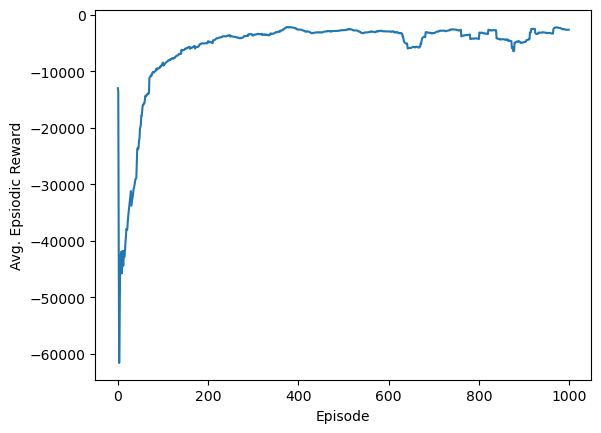

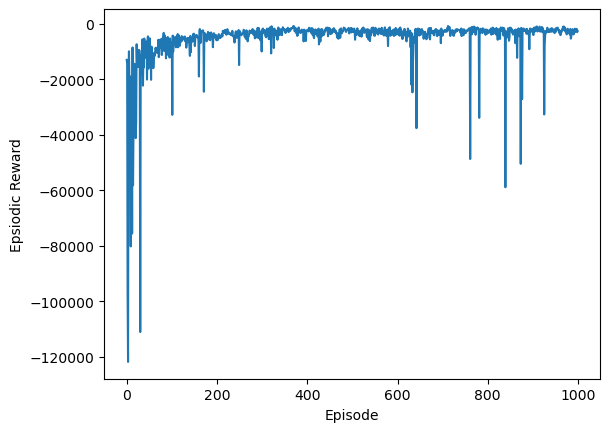

In [20]:
ep_reward_list = []
avg_reward_list = []
r = 0
rewards = []
J_values = []
actions= []
j = 0
values = []
for ep in range(total_episodes):
    prev_state = env.reset()
    episodic_reward = 0
    values.append([])
    #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
    for time in range(0,len(env.t)-20):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state, ou_noise)
        state, reward, done, info = env.step(action)
        buffer.record((prev_state, action, reward, state))
        episodic_reward += reward
        buffer.learn()
        update_target(target_actor.variables, actor_model.variables, tau)
        update_target(target_critic.variables, critic_model.variables, tau)
        prev_state = state

    
    ep_reward_list.append(episodic_reward)
    J_values.append(env.J_val)
    actions.append(env.en) 
    values[ep].append(env.values)
    avg_reward = np.mean(ep_reward_list[-40:])
    print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
    print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
    avg_reward_list.append(avg_reward)
    
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()
plt.plot(ep_reward_list)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
plt.show()
np.savetxt('reward.txt', ep_reward_list) 
np.savetxt('avg_reward.txt',avg_reward_list) 
np.savetxt('Jval_QC.txt',np.squeeze(J_values))

In [ ]:
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Epsiodic Reward")
plt.show()
plt.plot(ep_reward_list)
plt.xlabel("Episode")
plt.ylabel("Epsiodic Reward")
plt.show()

In [86]:
ep = np.arange(0, total_episodes, 1)
input = np.array([ep, np.squeeze(avg_reward_list), np.squeeze(J_values)])
print(input.T.shape)
result=np.savetxt('Reward.txt', input.T, delimiter=' ')
print(result)

(1000, 3)
None


In [84]:
np.save('reward.npy', ep_reward_list) 
np.save('avg_reward.npy',avg_reward_list) 
np.save('Jval_QC.npy',np.squeeze(J_values)) 
np.save('ep_Action_list.npy', np.squeeze(Action))
np.save('ep_State_list.npy', np.squeeze(values))

[[2949.63093601]] [[1060.82110826]]
Episode * 0 * Reward is ==> -27633.81334061967
Episode * 0 * J_value is ==> 3140.2459895024235
[[1298.61838782]] [[872.21284431]]
Episode * 1 * Reward is ==> -11507.654534308913
Episode * 1 * J_value is ==> 1305.526786690054
[[9803.13298307]] [[2111.43375435]]
Episode * 2 * Reward is ==> -89851.68238014063
Episode * 2 * J_value is ==> 10184.079484976559
[[1099.92353564]] [[828.81333333]]
Episode * 3 * Reward is ==> -9594.899574614761
Episode * 3 * J_value is ==> 1079.4510538211698
[[6042.10359563]] [[1913.67974614]]
Episode * 4 * Reward is ==> -54334.61639812381
Episode * 4 * J_value is ==> 6152.124563429053
[[1315.73867336]] [[410.37288429]]
Episode * 5 * Reward is ==> -12530.830156325066
Episode * 5 * J_value is ==> 1423.998802197158
[[5163.41545978]] [[1070.25092508]]
Episode * 6 * Reward is ==> -47184.03490278831
Episode * 6 * J_value is ==> 5361.683035301335
[[4628.49316591]] [[1083.36741587]]
Episode * 7 * Reward is ==> -40223.406053972125
Epis

Episode * 62 * Reward is ==> -22830.504537818906
Episode * 62 * J_value is ==> 2590.318254367934
[[5104.61419837]] [[1393.16648658]]
Episode * 63 * Reward is ==> -44824.104296500314
Episode * 63 * J_value is ==> 5070.220462474272
[[3546.17222538]] [[1097.40643053]]
Episode * 64 * Reward is ==> -29586.288575873372
Episode * 64 * J_value is ==> 3357.658426809032
[[731.6922505]] [[345.13114928]]
Episode * 65 * Reward is ==> -6766.085857520224
Episode * 65 * J_value is ==> 766.6669782811887
[[9918.90156072]] [[2021.25820633]]
Episode * 66 * Reward is ==> -69341.6551097635
Episode * 66 * J_value is ==> 7864.260306770291
[[4062.29053715]] [[964.5571758]]
Episode * 67 * Reward is ==> -35636.9014800453
Episode * 67 * J_value is ==> 4049.6735233748973
[[941.30880308]] [[365.48960069]]
Episode * 68 * Reward is ==> -8665.252781359148
Episode * 68 * J_value is ==> 985.5580217002453
[[4649.48915623]] [[1021.15580324]]
Episode * 69 * Reward is ==> -39049.42333278352
Episode * 69 * J_value is ==> 442

Episode * 124 * Reward is ==> -50354.21478711664
Episode * 124 * J_value is ==> 5717.11267836664
[[5397.6714471]] [[1309.35291068]]
Episode * 125 * Reward is ==> -38930.6323093962
Episode * 125 * J_value is ==> 4424.157226499192
[[1699.68799539]] [[1167.20541516]]
Episode * 126 * Reward is ==> -14864.913633236614
Episode * 126 * J_value is ==> 1688.8811534176148
[[2440.95726147]] [[1089.1651847]]
Episode * 127 * Reward is ==> -19980.635533841152
Episode * 127 * J_value is ==> 2273.0325595403738
[[1848.8936337]] [[707.18344107]]
Episode * 128 * Reward is ==> -15353.655607002263
Episode * 128 * J_value is ==> 1747.2835809927653
[[3173.27957417]] [[827.59997565]]
Episode * 129 * Reward is ==> -25567.827677599304
Episode * 129 * J_value is ==> 2901.1432239321443
[[6753.00463404]] [[1479.79560462]]
Episode * 130 * Reward is ==> -46364.874706064635
Episode * 130 * J_value is ==> 5265.685641340697
[[1504.69668056]] [[1076.71740491]]
Episode * 131 * Reward is ==> -12240.352770787338
Episode * 

Episode * 186 * Reward is ==> -11120.439383316956
Episode * 186 * J_value is ==> 1263.1130894919193
[[4935.26668147]] [[975.57611825]]
Episode * 187 * Reward is ==> -49939.55379485266
Episode * 187 * J_value is ==> 5675.218063467509
[[2471.09817429]] [[756.39513051]]
Episode * 188 * Reward is ==> -15462.059472421392
Episode * 188 * J_value is ==> 1758.2569545854044
[[1573.21482685]] [[666.88840383]]
Episode * 189 * Reward is ==> -15011.877766855205
Episode * 189 * J_value is ==> 1704.7362792681226
[[4181.95983026]] [[957.6723543]]
Episode * 190 * Reward is ==> -48242.26093440537
Episode * 190 * J_value is ==> 5488.418964791091
[[795.91233084]] [[437.67237282]]
Episode * 191 * Reward is ==> -10293.05071655348
Episode * 191 * J_value is ==> 1169.0630734677497
[[2868.47438579]] [[688.18173967]]
Episode * 192 * Reward is ==> -23679.4823696024
Episode * 192 * J_value is ==> 2685.511048762558
[[1314.85692784]] [[693.10976542]]
Episode * 193 * Reward is ==> -18780.691006866015
Episode * 193 *

Episode * 248 * Reward is ==> -19658.496561302505
Episode * 248 * J_value is ==> 2234.6852034677104
[[6187.51605898]] [[1645.74787706]]
Episode * 249 * Reward is ==> -52359.61767845193
Episode * 249 * J_value is ==> 5948.693181432819
[[2547.5083314]] [[907.74403932]]
Episode * 250 * Reward is ==> -18148.478590404255
Episode * 250 * J_value is ==> 2053.1956328641622
[[2471.61866562]] [[1207.93335632]]
Episode * 251 * Reward is ==> -49335.1845976139
Episode * 251 * J_value is ==> 5611.958248299598
[[7029.54920819]] [[2434.55896626]]
Episode * 252 * Reward is ==> -38854.05318150182
Episode * 252 * J_value is ==> 4408.7875329858925
[[5793.23949795]] [[1846.33283484]]
Episode * 253 * Reward is ==> -32020.636330033838
Episode * 253 * J_value is ==> 3627.762500946148
[[2431.88543484]] [[1244.90239989]]
Episode * 254 * Reward is ==> -50049.4265927686
Episode * 254 * J_value is ==> 5686.183027816116
[[2535.06026822]] [[1316.68396456]]
Episode * 255 * Reward is ==> -50243.80890843944
Episode * 2

Episode * 310 * Reward is ==> -4458.361457501047
Episode * 310 * J_value is ==> 506.9307697903845
[[5440.22919931]] [[1235.86887614]]
Episode * 311 * Reward is ==> -3683.0500435617546
Episode * 311 * J_value is ==> 417.4000011745235
[[4812.84679727]] [[1694.62803655]]
Episode * 312 * Reward is ==> -4932.834761326194
Episode * 312 * J_value is ==> 559.8091637288846
[[8209.59697559]] [[1894.74364033]]
Episode * 313 * Reward is ==> -8531.399464794542
Episode * 313 * J_value is ==> 968.105509343531
[[1499.95545646]] [[539.79095837]]
Episode * 314 * Reward is ==> -3869.285979506808
Episode * 314 * J_value is ==> 439.2927594012096
[[2556.52312528]] [[661.53816741]]
Episode * 315 * Reward is ==> -2707.892858366575
Episode * 315 * J_value is ==> 306.3442977248445
[[1837.5390138]] [[693.93160956]]
Episode * 316 * Reward is ==> -2979.6452689653925
Episode * 316 * J_value is ==> 337.8383653990599
[[5123.89610812]] [[1092.05912259]]
Episode * 317 * Reward is ==> -2772.5675127972904
Episode * 317 *

Episode * 372 * Reward is ==> -4145.2491651580385
Episode * 372 * J_value is ==> 469.90250447387876
[[3875.87888531]] [[1269.17145423]]
Episode * 373 * Reward is ==> -2975.177244242694
Episode * 373 * J_value is ==> 337.21684699648193
[[3816.80395775]] [[1446.64074179]]
Episode * 374 * Reward is ==> -2537.2511923124353
Episode * 374 * J_value is ==> 286.7314333174479
[[834.5110428]] [[593.73529689]]
Episode * 375 * Reward is ==> -2652.559939279271
Episode * 375 * J_value is ==> 300.54626697355826
[[599.94571429]] [[372.16865418]]
Episode * 376 * Reward is ==> -2484.4352636103195
Episode * 376 * J_value is ==> 281.183111082719
[[1006.96262855]] [[709.37921414]]
Episode * 377 * Reward is ==> -2482.900605286101
Episode * 377 * J_value is ==> 281.04043577156796
[[1146.11408189]] [[419.63955901]]
Episode * 378 * Reward is ==> -4964.285723893652
Episode * 378 * J_value is ==> 563.9304983797804
[[608.94867527]] [[299.98256257]]
Episode * 379 * Reward is ==> -1705.1924888237068
Episode * 379 *

Episode * 434 * Reward is ==> -2856.856621530787
Episode * 434 * J_value is ==> 324.3416295097543
[[4282.81045552]] [[984.54222692]]
Episode * 435 * Reward is ==> -2740.1513489732088
Episode * 435 * J_value is ==> 310.57471129223245
[[7674.47112537]] [[1754.91667594]]
Episode * 436 * Reward is ==> -3081.3192769073626
Episode * 436 * J_value is ==> 348.7158535755788
[[1561.51202272]] [[721.05377154]]
Episode * 437 * Reward is ==> -2350.160669816128
Episode * 437 * J_value is ==> 266.107263598996
[[4529.79155075]] [[1414.08676168]]
Episode * 438 * Reward is ==> -3283.3292633754822
Episode * 438 * J_value is ==> 370.9850350491158
[[2753.91746048]] [[591.50500718]]
Episode * 439 * Reward is ==> -2000.417899846811
Episode * 439 * J_value is ==> 226.5464678894198
[[2207.95968377]] [[700.55419345]]
Episode * 440 * Reward is ==> -1962.9410021640344
Episode * 440 * J_value is ==> 221.2492742668345
[[1925.21011626]] [[919.99371697]]
Episode * 441 * Reward is ==> -2140.2626592995084
Episode * 441

Episode * 495 * Reward is ==> -3430.5126501566992
Episode * 495 * J_value is ==> 387.2263728851269
[[2783.01628129]] [[832.00917428]]
Episode * 496 * Reward is ==> -1824.821955714123
Episode * 496 * J_value is ==> 205.86746343079648
[[7338.38656558]] [[1417.13117208]]
Episode * 497 * Reward is ==> -3738.258022121698
Episode * 497 * J_value is ==> 421.65947700663577
[[4781.84484945]] [[964.6050839]]
Episode * 498 * Reward is ==> -2341.856505643954
Episode * 498 * J_value is ==> 265.0334427332139
[[4231.16558197]] [[1413.69286804]]
Episode * 499 * Reward is ==> -1909.5369651718438
Episode * 499 * J_value is ==> 214.47532455130093
[[3147.83024599]] [[997.14741765]]
Episode * 500 * Reward is ==> -1700.9193972227833
Episode * 500 * J_value is ==> 191.24385429352412
[[9841.14568939]] [[1631.27087046]]
Episode * 501 * Reward is ==> -1932.1128451791383
Episode * 501 * J_value is ==> 217.98465812168664
[[3305.92651759]] [[921.26157572]]
Episode * 502 * Reward is ==> -1029.4030698019599
Episode 

Episode * 556 * Reward is ==> -1872.515915529031
Episode * 556 * J_value is ==> 211.38528516260516
[[1154.21754789]] [[837.18062195]]
Episode * 557 * Reward is ==> -2172.8715009419325
Episode * 557 * J_value is ==> 244.7142281211667
[[27909.96248604]] [[3917.20374869]]
Episode * 558 * Reward is ==> -1746.9680603017687
Episode * 558 * J_value is ==> 196.66491370253786
[[5281.54208777]] [[1594.75313878]]
Episode * 559 * Reward is ==> -1510.835715881055
Episode * 559 * J_value is ==> 170.11643106113314
[[7667.3871747]] [[1364.88079892]]
Episode * 560 * Reward is ==> -2046.5800007198604
Episode * 560 * J_value is ==> 230.90554918015394
[[10791.37969817]] [[1561.32758604]]
Episode * 561 * Reward is ==> -1329.8704005212148
Episode * 561 * J_value is ==> 149.08818704431445
[[3467.57783991]] [[1430.02652374]]
Episode * 562 * Reward is ==> -2322.0275960546
Episode * 562 * J_value is ==> 261.2071121079894
[[2208.9119026]] [[622.2441183]]
Episode * 563 * Reward is ==> -2320.335847270228
Episode *

Episode * 617 * Reward is ==> -2359.304910822591
Episode * 617 * J_value is ==> 266.0043028139943
[[7274.97529478]] [[1445.09864701]]
Episode * 618 * Reward is ==> -2324.055403562018
Episode * 618 * J_value is ==> 262.09452314636656
[[5896.61869616]] [[1729.2470702]]
Episode * 619 * Reward is ==> -1790.9604479352336
Episode * 619 * J_value is ==> 201.69933216248702
[[1944.27052775]] [[730.68546357]]
Episode * 620 * Reward is ==> -1724.8189471372061
Episode * 620 * J_value is ==> 193.76636120373456
[[1573.83254498]] [[967.91410279]]
Episode * 621 * Reward is ==> -1497.1149468865096
Episode * 621 * J_value is ==> 167.5206096527286
[[13580.44744428]] [[2013.12790731]]
Episode * 622 * Reward is ==> -1487.2076229056713
Episode * 622 * J_value is ==> 166.8082404009738
[[11320.64044309]] [[1772.64441643]]
Episode * 623 * Reward is ==> -2096.099515629903
Episode * 623 * J_value is ==> 236.75966770328097
[[1753.9894275]] [[887.47639871]]
Episode * 624 * Reward is ==> -2322.4806453717647
Episode

Episode * 678 * Reward is ==> -1534.9929414750545
Episode * 678 * J_value is ==> 172.3655605753607
[[1013.18676913]] [[649.34961098]]
Episode * 679 * Reward is ==> -2064.0874555375262
Episode * 679 * J_value is ==> 233.13899545097124
[[2166.44550208]] [[1071.6953112]]
Episode * 680 * Reward is ==> -1752.4946806265948
Episode * 680 * J_value is ==> 196.6760523028844
[[20543.84587151]] [[3817.4965764]]
Episode * 681 * Reward is ==> -1429.7644733250966
Episode * 681 * J_value is ==> 160.11452181668068
[[3343.59967511]] [[933.64769411]]
Episode * 682 * Reward is ==> -1635.563811290276
Episode * 682 * J_value is ==> 183.22552733901253
[[6249.3027753]] [[1343.00189912]]
Episode * 683 * Reward is ==> -1129.2543621941334
Episode * 683 * J_value is ==> 126.55714391906335
[[2416.51105315]] [[955.8000139]]
Episode * 684 * Reward is ==> -2181.284669225695
Episode * 684 * J_value is ==> 245.93974656918053
[[2487.8193605]] [[823.38371262]]
Episode * 685 * Reward is ==> -1475.1323858683204
Episode * 

Episode * 740 * Reward is ==> -3075.8982241970525
Episode * 740 * J_value is ==> 348.40583729436315
[[3282.70049589]] [[1130.90829544]]
Episode * 741 * Reward is ==> -2201.9507814033
Episode * 741 * J_value is ==> 248.79763230654171
[[2513.19101312]] [[804.52838207]]
Episode * 742 * Reward is ==> -2403.6704195101
Episode * 742 * J_value is ==> 271.87295730045173
[[1690.66343745]] [[763.5614236]]
Episode * 743 * Reward is ==> -1965.9150917655002
Episode * 743 * J_value is ==> 222.4018766676889
[[1282.24298961]] [[442.94093642]]
Episode * 744 * Reward is ==> -2020.8301761737857
Episode * 744 * J_value is ==> 228.29830542847787
[[3324.97004006]] [[1173.53423421]]
Episode * 745 * Reward is ==> -3247.464712062319
Episode * 745 * J_value is ==> 367.6620489689425
[[1143.75498247]] [[375.27533208]]
Episode * 746 * Reward is ==> -2186.778632778526
Episode * 746 * J_value is ==> 245.94264528307897
[[6222.34128916]] [[1240.14308398]]
Episode * 747 * Reward is ==> -2421.1529583986407
Episode * 747

Episode * 802 * Reward is ==> -3137.294535429146
Episode * 802 * J_value is ==> 355.07955607991147
[[3491.4198487]] [[1179.899679]]
Episode * 803 * Reward is ==> -2284.510391825764
Episode * 803 * J_value is ==> 257.52149586799044
[[9494.2876075]] [[1848.44960341]]
Episode * 804 * Reward is ==> -3660.08039192579
Episode * 804 * J_value is ==> 413.42916665100785
[[9704.61237262]] [[2269.98774405]]
Episode * 805 * Reward is ==> -3243.65909282842
Episode * 805 * J_value is ==> 365.54431011491255
[[2216.50537966]] [[500.42884595]]
Episode * 806 * Reward is ==> -1138.0695918116296
Episode * 806 * J_value is ==> 126.67144284556406
[[1973.35591569]] [[1097.35796093]]
Episode * 807 * Reward is ==> -1635.7095969913726
Episode * 807 * J_value is ==> 182.8120049205801
[[3613.9805796]] [[1105.08931201]]
Episode * 808 * Reward is ==> -1236.598060799128
Episode * 808 * J_value is ==> 137.61563987453164
[[4722.09172203]] [[1002.37411115]]
Episode * 809 * Reward is ==> -1362.98433710228
Episode * 809 

Episode * 863 * Reward is ==> -2283.177401357145
Episode * 863 * J_value is ==> 257.51138516724586
[[3132.2299629]] [[1176.77381467]]
Episode * 864 * Reward is ==> -2242.5971525639343
Episode * 864 * J_value is ==> 251.93952310988854
[[4891.61805038]] [[1595.5599335]]
Episode * 865 * Reward is ==> -2122.054997912177
Episode * 865 * J_value is ==> 238.971579129378
[[4948.91002019]] [[927.34189603]]
Episode * 866 * Reward is ==> -1510.7414760571842
Episode * 866 * J_value is ==> 169.1468459084073
[[2693.79262373]] [[751.1794668]]
Episode * 867 * Reward is ==> -1593.2973780858179
Episode * 867 * J_value is ==> 179.20868883855502
[[8198.73360325]] [[1929.79041804]]
Episode * 868 * Reward is ==> -3484.6353679648787
Episode * 868 * J_value is ==> 394.1307365349766
[[3423.92377739]] [[929.36438168]]
Episode * 869 * Reward is ==> -3657.638119352542
Episode * 869 * J_value is ==> 413.3358451275427
[[2547.35527558]] [[943.68097081]]
Episode * 870 * Reward is ==> -2449.540715880321
Episode * 870 

Episode * 925 * Reward is ==> -2060.041084084813
Episode * 925 * J_value is ==> 231.39009019876164
[[8306.03608058]] [[1724.9978041]]
Episode * 926 * Reward is ==> -2991.941966288997
Episode * 926 * J_value is ==> 338.034509066392
[[3057.59078176]] [[975.52134648]]
Episode * 927 * Reward is ==> -1954.6762383022244
Episode * 927 * J_value is ==> 220.7070559109556
[[4638.0870627]] [[1138.22050785]]
Episode * 928 * Reward is ==> -4608.577189539774
Episode * 928 * J_value is ==> 522.9132345871078
[[2462.79072191]] [[1021.48497014]]
Episode * 929 * Reward is ==> -6051.628395205641
Episode * 929 * J_value is ==> 685.3539294169844
[[10228.58057045]] [[1822.51585325]]
Episode * 930 * Reward is ==> -1734.362262281779
Episode * 930 * J_value is ==> 194.7940792058345
[[7640.30245888]] [[1894.16748842]]
Episode * 931 * Reward is ==> -3831.253784951457
Episode * 931 * J_value is ==> 434.2678265225875
[[2043.34455597]] [[800.2362799]]
Episode * 932 * Reward is ==> -2115.4012358626514
Episode * 932 *

Episode * 987 * Reward is ==> -1089.6215695294184
Episode * 987 * J_value is ==> 122.57210881799747
[[2318.51965943]] [[872.08268926]]
Episode * 988 * Reward is ==> -1759.019729860089
Episode * 988 * J_value is ==> 196.91947360624368
[[7030.14623657]] [[1297.92401827]]
Episode * 989 * Reward is ==> -1112.083325355446
Episode * 989 * J_value is ==> 124.7435573167207
[[11732.55137963]] [[2129.34080381]]
Episode * 990 * Reward is ==> -1522.1794117957331
Episode * 990 * J_value is ==> 170.4181005073952
[[1301.60064691]] [[1032.6882098]]
Episode * 991 * Reward is ==> -1220.280786296719
Episode * 991 * J_value is ==> 136.3619702563925
[[2914.39195779]] [[807.01851072]]
Episode * 992 * Reward is ==> -1343.131643727469
Episode * 992 * J_value is ==> 150.8171782469179
[[2368.66178664]] [[736.25662259]]
Episode * 993 * Reward is ==> -718.5255655484787
Episode * 993 * J_value is ==> 79.75559921427383
[[6146.01975789]] [[1656.29775875]]
Episode * 994 * Reward is ==> -795.61633036658
Episode * 994 

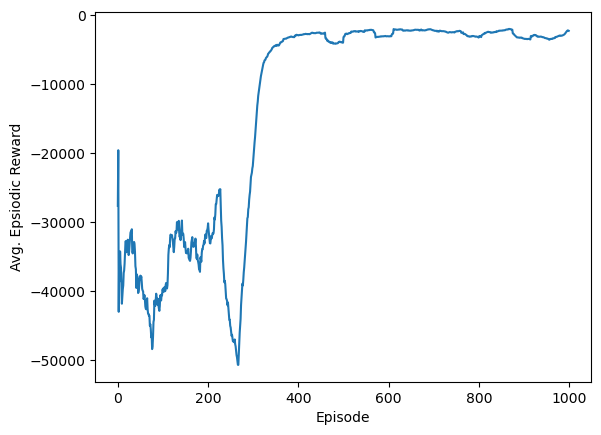

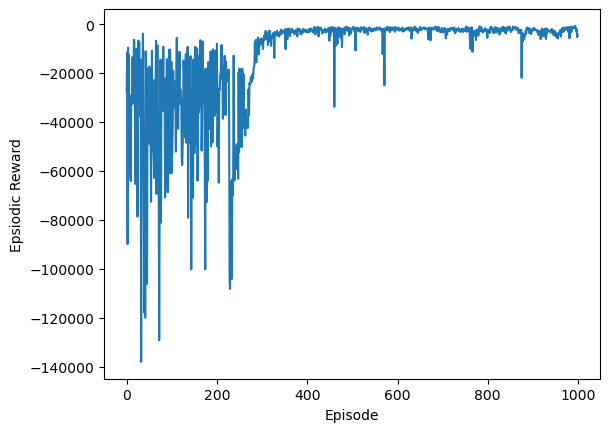

In [16]:
# ep_reward_list = []
# avg_reward_list = []
# r = 0
# rewards = []
# J_values = []
# actions= []
# j = 0
# values = []
# for ep in range(total_episodes):
#     prev_state = env.reset()
#     episodic_reward = 0
#     values.append([])
#     #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
#     for time in range(0,len(env.t)-20):
#         env.time_current = time
#         tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
#         action = policy(tf_prev_state, ou_noise)
#         state, reward, done, info = env.step(action)
#         buffer.record((prev_state, action, reward, state))
#         episodic_reward += reward
#         buffer.learn()
#         update_target(target_actor.variables, actor_model.variables, tau)
#         update_target(target_critic.variables, critic_model.variables, tau)
#         prev_state = state

    
#     ep_reward_list.append(episodic_reward)
#     J_values.append(env.J_val)
#     actions.append(env.en) 
#     values[ep].append(env.values)
#     avg_reward = np.mean(ep_reward_list[-40:])
#     print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
#     print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
#     avg_reward_list.append(avg_reward)
    
# plt.plot(avg_reward_list)
# plt.xlabel("Episode")
# plt.ylabel("Avg. Epsiodic Reward")
# plt.show()
# plt.plot(ep_reward_list)
# plt.xlabel("Episode")
# plt.ylabel("Epsiodic Reward")
# plt.show()
# np.savetxt('reward.txt', ep_reward_list) 
# np.savetxt('avg_reward.txt',avg_reward_list) 

In [61]:
np.savetxt('avg_reward.txt',avg_reward_list) 
np.savetxt('J_values_QCmodel.txt',J_values) 
np.savetxt('State_QCmodel.txt',np.squeeze(values[total_episodes-1]))

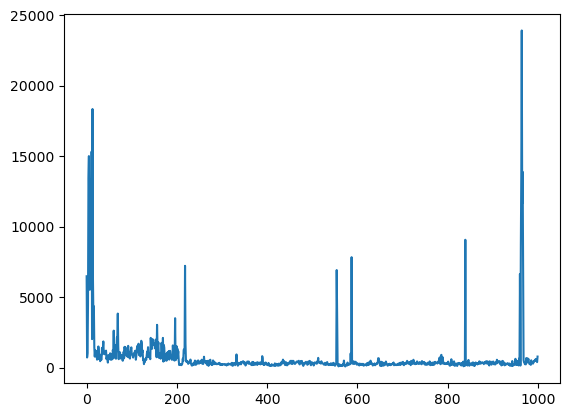

In [70]:
plt.plot(J_values)

In [73]:
# DS['zmean'][0]=0
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.size'] = 24

# figure1=plt.figure(figsize = (12, 2))
# xr = np.array(range(len(D[1,:])))
# plt.stem(xr,DS['zmean'], use_line_collection = True, linefmt='blue', basefmt="k")
# plt.axhline(y= 0.5, color='r', linestyle='-.')
# plt.ylabel('PIP', fontweight='bold');
# plt.title('(c) Third dof', fontweight='bold',fontsize=24)
# plt.grid(True); plt.ylim(0,1.05)
# plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
# figure1.savefig('TMD_drift3.pdf',format='pdf',dpi=600,bbox_inches='tight')

In [21]:
actor_model.save_weights("q_car_state_actor_G0p9T0p05.h5")
critic_model.save_weights("q_car_state_critic_G0p9T0p05.h5")

target_actor.save_weights("q_car_target__state_actor_G0p9T0p05.h5")
target_critic.save_weights("q_car_target__random_critic_G0p9T0p05.h5")

In [45]:
del actor_model 
del critic_model

del target_actor 
del target_critic 
del policy

In [46]:
actor_model = get_actor()
critic_model = get_critic()

target_actor = get_actor()
target_critic = get_critic()

In [47]:
actor_model.load_weights("q_car_state_actor_G0p9T0p05.h5")
critic_model.load_weights("q_car_state_critic_G0p9T0p05.h5")

target_actor.load_weights("q_car_target__state_actor_G0p9T0p05.h5")
target_critic.save_weights("q_car_target__random_critic_G0p9T0p05.h5")

In [48]:
 def policy(state):
    sampled_actions = tf.squeeze(actor_model(state))
   
    sampled_actions = sampled_actions.numpy() 
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

In [54]:
T = 40
dt = 0.01
t = np.arange(0, T+dt, dt)
nt = len(t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
x_dp = np.zeros([nt, 2*n, 6])
y_dp = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
Action =  np.zeros([nt, 6])
Action1 =  np.zeros([nt, 6])
U = np.zeros([nt, 6])
ep = total_episodes-1


# Input Sinusoid (Resonant Frequencies)
k = 0
for i in range(1, 3):
    for j in range(0, 3):
        omega1 = i
        omega2 = j/10
        amplitude = (np.sin(omega1*t) + np.sin(omega2*t))
        prev_state = env.reset()
        env.amplitude = amplitude
        episodic_reward = 0
        #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
        for time in range(0,len(env.t)-20):
            env.time_current = time
            tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
            action = policy(tf_prev_state)
            state, reward, done, info = env.step(action)
            episodic_reward += reward
            prev_state = state
        #avg_reward = np.mean(ep_reward_list[-40:])
        #print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
        print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
        
        x_dp[0:3981,:,k]=np.array([env.values[0], env.values[1], env.values[2], env.values[3]]).T
        Action[0:3981,k] = np.squeeze(env.en)
        for tkk in range(0,nt-1):
            Action1[tkk, k] = Kp1@np.array([x_dp[tkk,:,k]]).T
            y1 = (Cd @ np.array([x_dp[tkk,:,k]]).T) + (Dd*np.array([Action[tkk,k]]))
            y_dp[tkk,:,k] = y1[1:3,:].T
        # Openloop
        sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
        t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
        x_uc[:, :, k] = x1
        y_uc[:, :, k] = y1[:, 1:3]
        del t1, y1, x1

        sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
        t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
        x_c[:, :, k] = x2
        y_c[:, :, k] = y2[:, 1:3]
        del t2, y2, x2
        k = k+1
del i, j, k
for k in range(0, 6):
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_uc[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
print(J2_val)
print(J1_val)

C:\Users\USER\anaconda3\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


[[6654.93836907]] [[1315.43682067]]
Episode * 999 * J_value is ==> 7485.724680022994
[[2650.27729219]] [[945.90431142]]
Episode * 999 * J_value is ==> 9802.310133547044
[[3293.70706657]] [[875.23426036]]
Episode * 999 * J_value is ==> 11818.418811930174
[[3256.52636704]] [[801.13248805]]
Episode * 999 * J_value is ==> 465761.8775565423
[[2770.77237736]] [[1230.01929401]]
Episode * 999 * J_value is ==> 455909.88261830417
[[845.43122099]] [[673.06253645]]
Episode * 999 * J_value is ==> 485884.5626957516
[[  5928.99190045]
 [  8733.96223775]
 [ 11061.43139842]
 [324668.77360252]
 [327550.04836975]
 [331324.32428298]]
[[   7730.66149397]
 [  10964.3944059 ]
 [  14641.84077091]
 [1421112.01140244]
 [1431401.70678702]
 [1439467.14511079]]


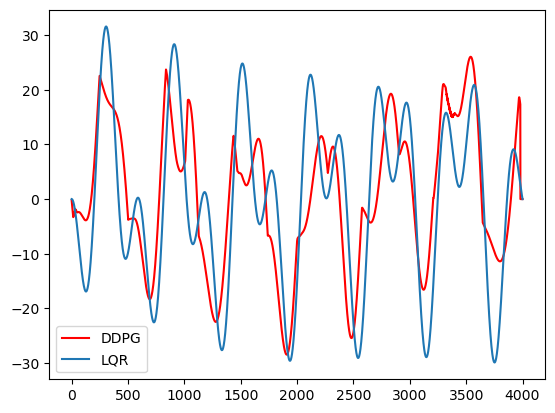

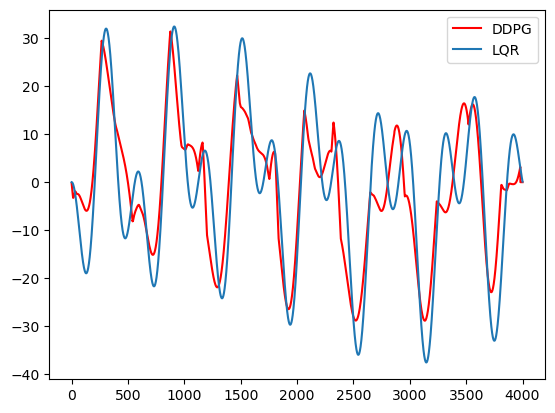

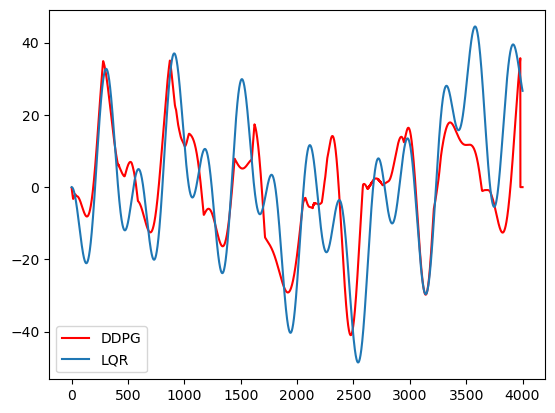

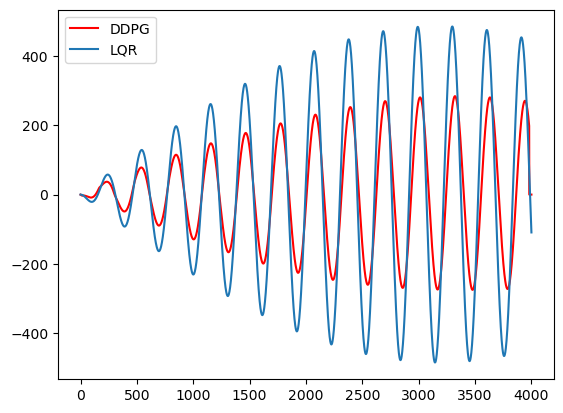

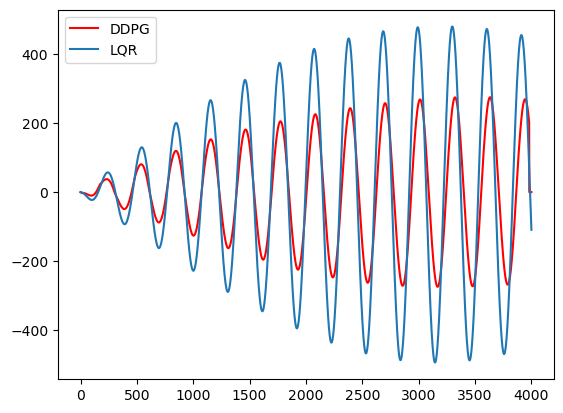

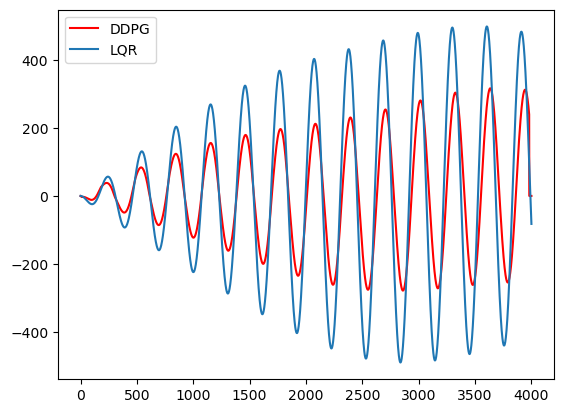

In [57]:
plt.figure()
plt.plot(Action1[:,0],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,0] ,label = "LQR")
plt.legend()

plt.figure()
plt.plot(Action1[:,1],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,1] ,label = "LQR")
plt.legend()

plt.figure()
plt.plot(Action1[:,2],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,2] ,label = "LQR")
plt.legend()

plt.figure()
plt.plot(Action1[:,3],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,3] ,label = "LQR")
plt.legend()


plt.figure()
plt.plot(Action1[:,4],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,4] ,label = "LQR")
plt.legend()

plt.figure()
plt.plot(Action1[:,5],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(U[:,5] ,label = "LQR")
plt.legend()

In [58]:
input = np.array([t, Action1[:,0], U[:,0], Action1[:,3], U[:,3]])
print(input.T.shape)
result=np.savetxt('Force_ddpg.txt', input.T, delimiter=' ')
print(result)

(4001, 5)
None


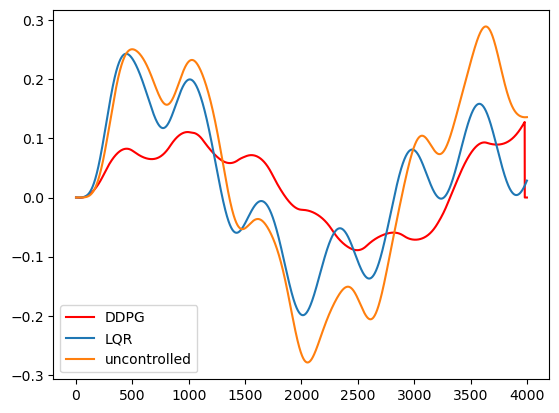

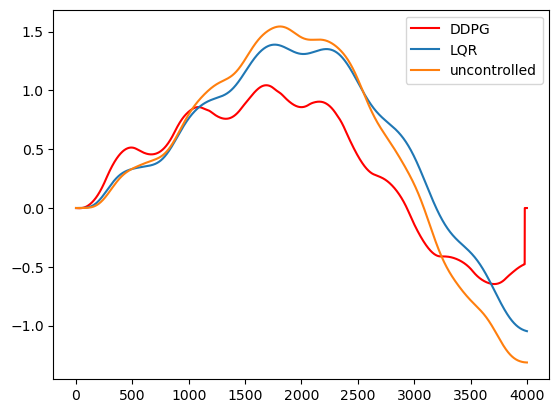

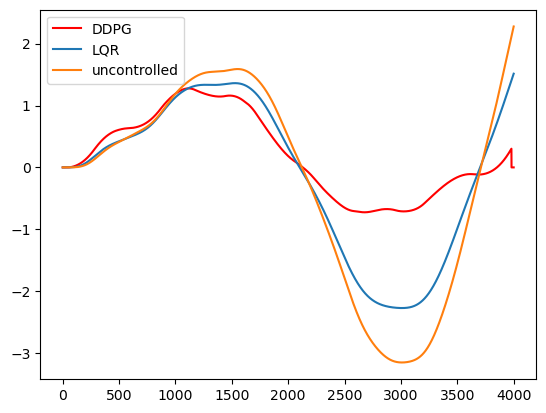

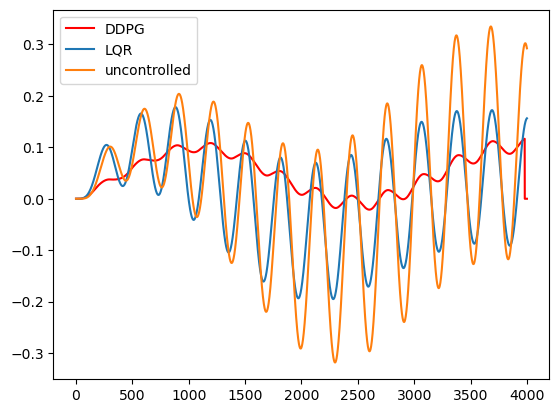

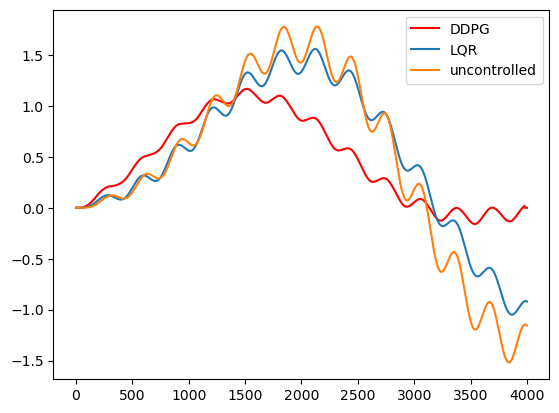

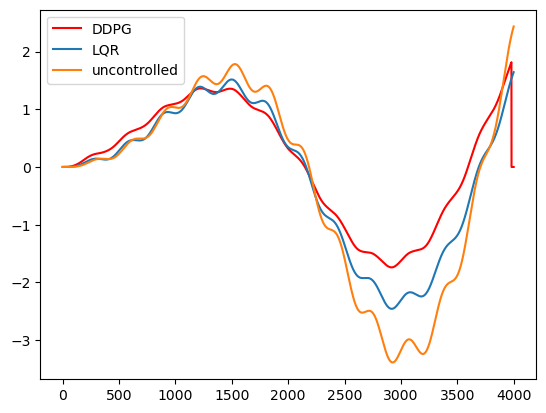

In [50]:
plt.figure()
plt.plot(0.1*x_dp[:,0,0],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,0] ,label = "LQR")
plt.plot(x_uc[:,0,0] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*x_dp[:,0,1],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,1] ,label = "LQR")
plt.plot(x_uc[:,0,1] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*x_dp[:,0,2],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,2] ,label = "LQR")
plt.plot(x_uc[:,0,2] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.1*x_dp[:,0,3],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,3] ,label = "LQR")
plt.plot(x_uc[:,0,3] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*x_dp[:,0,4],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,4] ,label = "LQR")
plt.plot(x_uc[:,0,4] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*x_dp[:,0,5],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(x_c[:,0,5] ,label = "LQR")
plt.plot(x_uc[:,0,5] ,label = "uncontrolled")
plt.legend()



In [51]:
input = np.array([t, 0.1*x_dp[:,0,0], x_c[:,0,0], x_uc[:,0,0], 0.1*x_dp[:,0,3], x_c[:,0,3], x_uc[:,0,3]])
print(input.T.shape)
result=np.savetxt('Disp_ddpg.txt', input.T, delimiter=' ')
print(result)

(4001, 7)
None


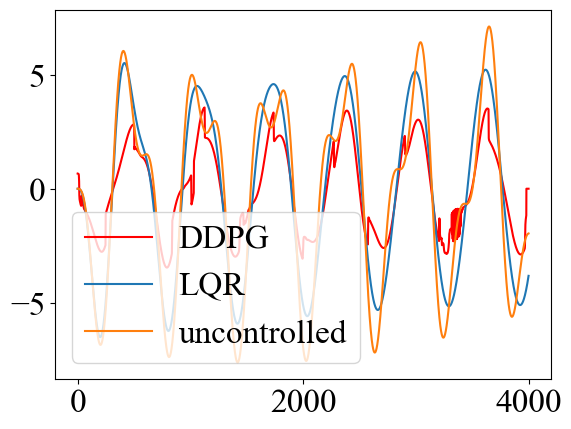

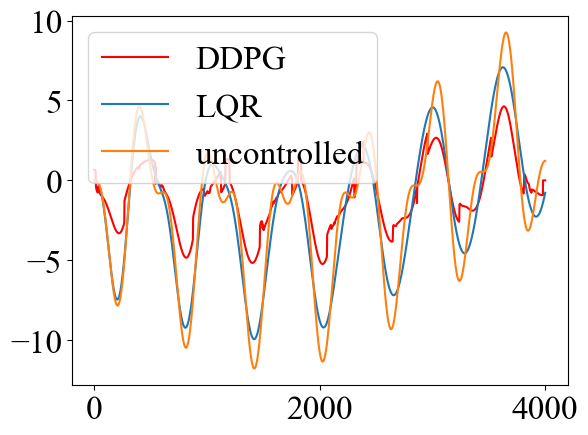

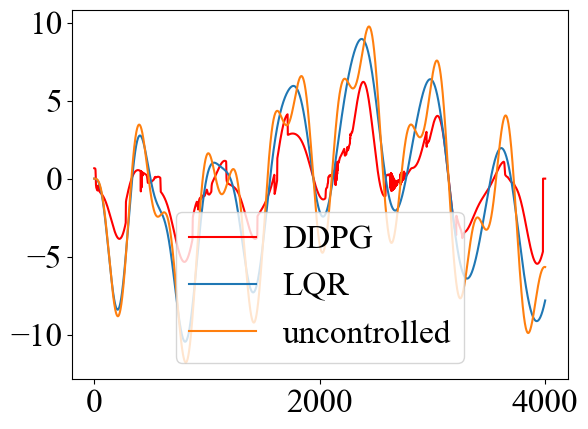

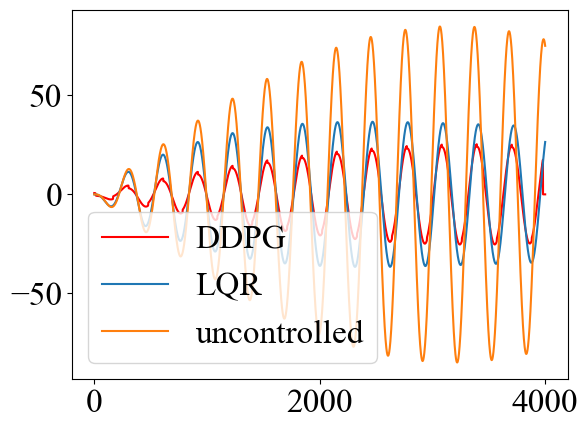

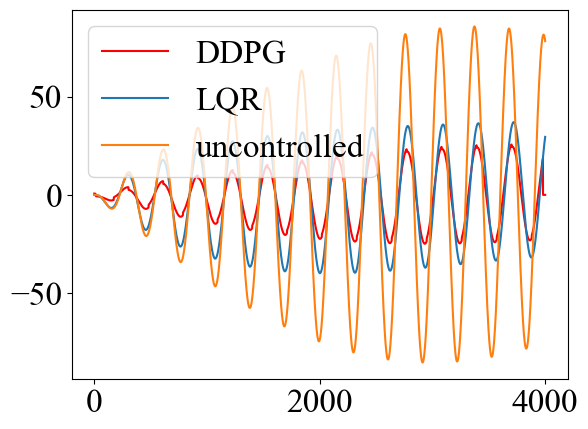

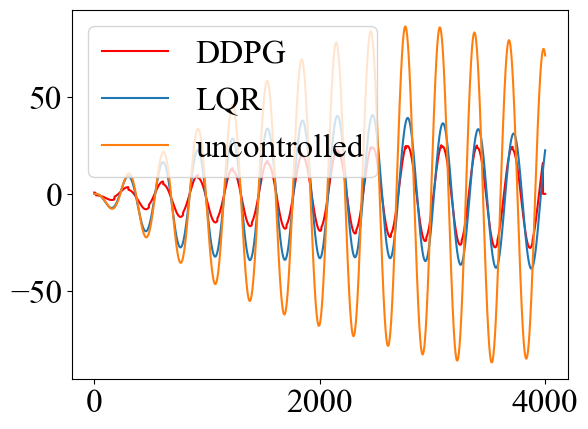

In [141]:
plt.figure()
plt.plot(0.5*y_dp[:,1,0],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,0] ,label = "LQR")
plt.plot(y_uc[:,1,0] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*y_dp[:,1,1],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,1] ,label = "LQR")
plt.plot(y_uc[:,1,1] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*y_dp[:,1,2],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,2] ,label = "LQR")
plt.plot(y_uc[:,1,2] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*y_dp[:,1,3],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,3] ,label = "LQR")
plt.plot(y_uc[:,1,3] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*y_dp[:,1,4],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,4] ,label = "LQR")
plt.plot(y_uc[:,1,4] ,label = "uncontrolled")
plt.legend()

plt.figure()
plt.plot(0.5*y_dp[:,1,5],'r',label='DDPG')
#plt.plot(env.amplitude,label="path")
plt.plot(y_c[:,1,5] ,label = "LQR")
plt.plot(y_uc[:,1,5] ,label = "uncontrolled")
plt.legend()

In [144]:
input = np.array([t, 0.5*y_dp[:,1,0], y_c[:,1,0], y_uc[:,1,0],  0.5*y_dp[:,1,3], y_c[:,1,3], y_uc[:,1,3]])
print(input.T.shape)
result=np.savetxt('Acc_ddpg.txt', input.T, delimiter=' ')
print(result)

(4001, 7)
None


In [ ]:
import numpy as np
reward = np.loadtxt("8_story.txt",float)
avg_reward = np.savetxt("8_story_avg.txt",float)
J = np.loadtxt("8story_ep_Jval_list.txt",float)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 24

figure1=plt.figure(figsize = (12, 2))
xr = np.array(range(len(D[1,:])))
plt.plot(avg_reward, use_line_collection = True, linefmt='blue',label = "Average Reward")
plt.plot(reward, use_line_collection = True, linefmt='red',label = "Episodic Reward")
plt.axhline(y= 0.5, color='r', linestyle='-.')
plt.ylabel('PIP', fontweight='bold');
plt.title('Enter Here', fontweight='bold',fontsize=24)
plt.grid(True);  
plt.xticks(fontweight='bold'); plt.yticks(fontweight='bold');
figure1.savefig('Reward_8Story.pdf',format='pdf',dpi=600,bbox_inches='tight')

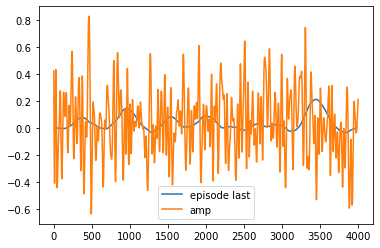

In [33]:
plt.plot(values[-1][0][0],label='episode last')
plt.plot(env.amplitude,label="amp")
plt.legend()
plt.show()

In [34]:
del policy

In [35]:
 def policy(state):
    sampled_actions = tf.squeeze(actor_model(state))
    sampled_actions = sampled_actions.numpy()  
    legal_action = np.clip(sampled_actions, lower_bound, upper_bound)

    return [np.squeeze(legal_action)]

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


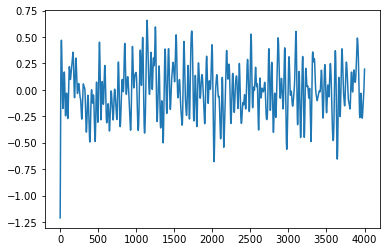

In [43]:
env.reset()
plt.plot(env.amplitude)

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 0 * Reward is ==> -16189.054195774537
Episode * 0 * J_value is ==> 1836.638905115007
[1932.66537349] [1482.24797511]


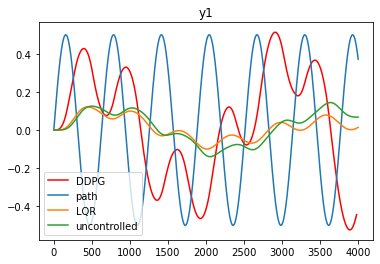

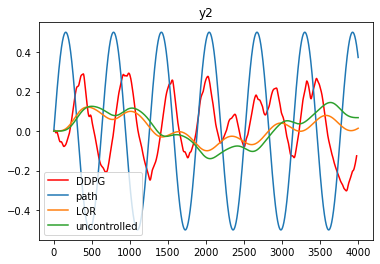

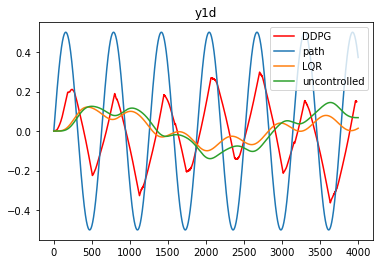

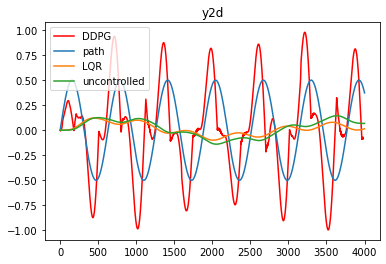

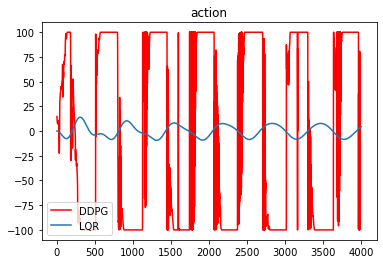

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 1 * Reward is ==> -141072.5287294595
Episode * 1 * J_value is ==> 15993.385970021864
[355278.00285061] [81167.19340064]


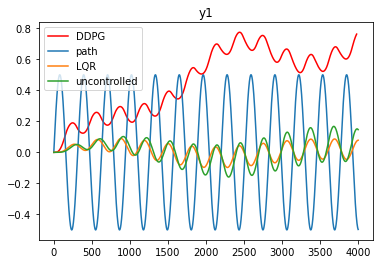

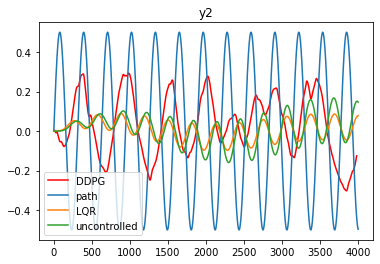

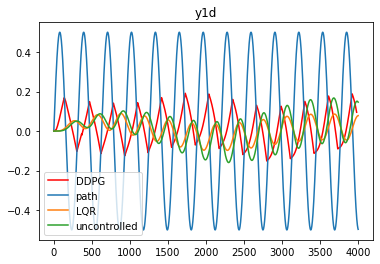

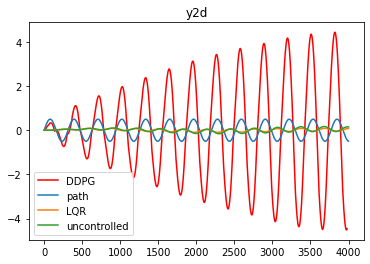

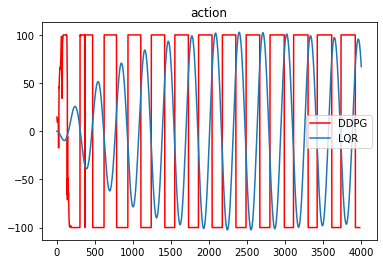

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 2 * Reward is ==> -1209.888476021169
Episode * 2 * J_value is ==> 139.95872040235218
[4579.43989228] [2267.99088354]


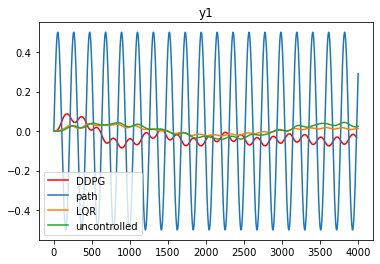

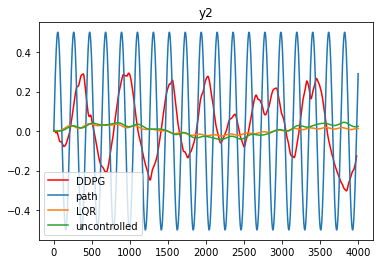

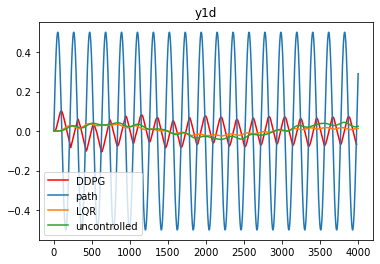

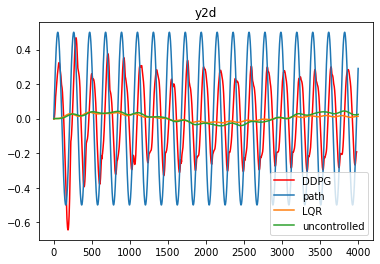

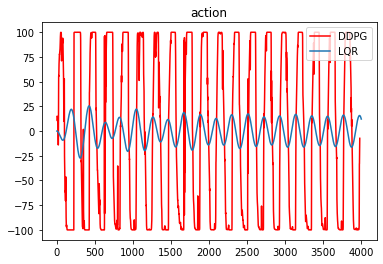

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 3 * Reward is ==> -970.866830036258
Episode * 3 * J_value is ==> 111.15816014480639
[1160.58225138] [560.93397823]


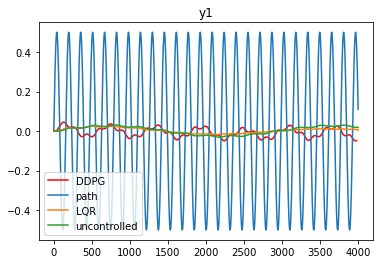

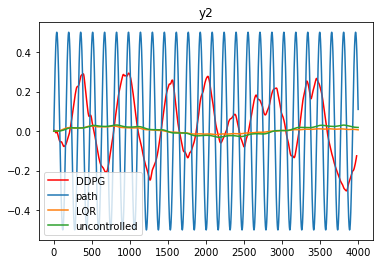

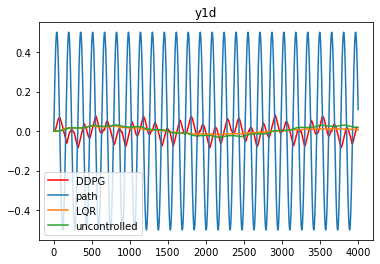

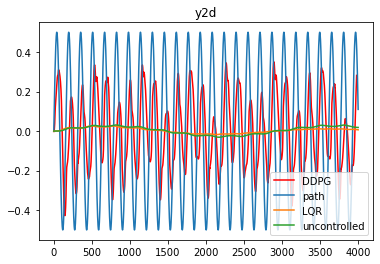

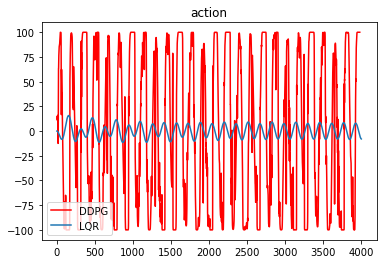

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 4 * Reward is ==> -997.0199723595468
Episode * 4 * J_value is ==> 113.01327014408814
[559.47790629] [260.64595677]


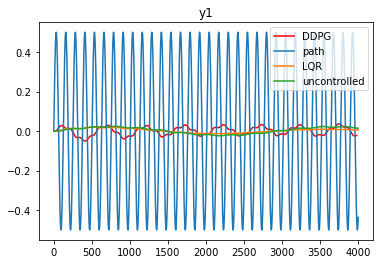

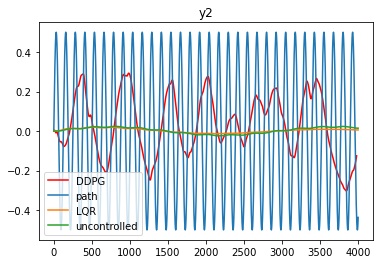

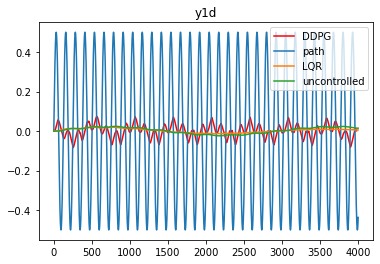

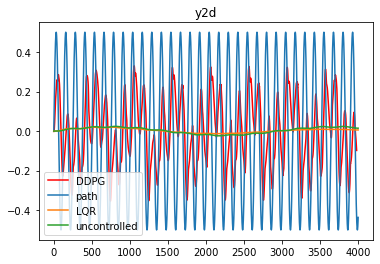

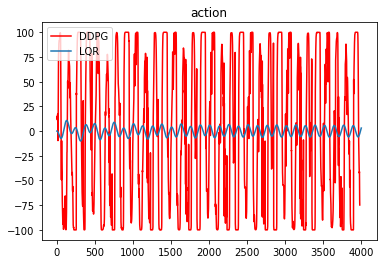

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 5 * Reward is ==> -1134.0840841409852
Episode * 5 * J_value is ==> 126.83344778765043
[339.41114327] [154.15134819]


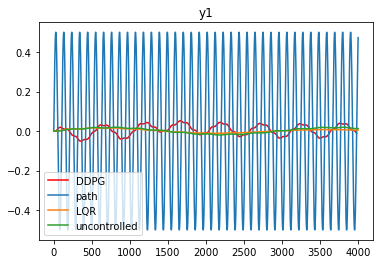

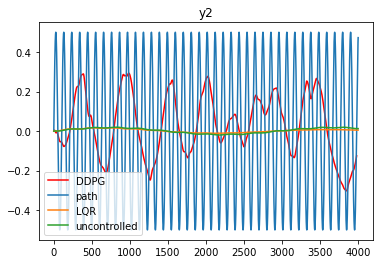

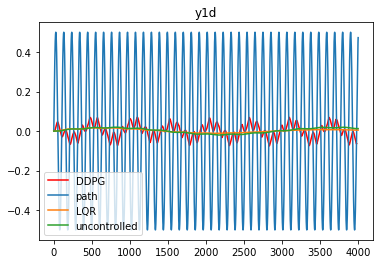

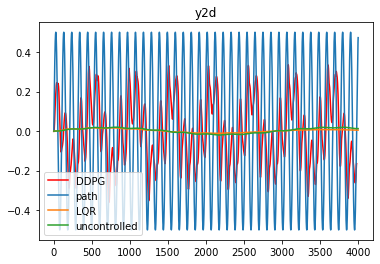

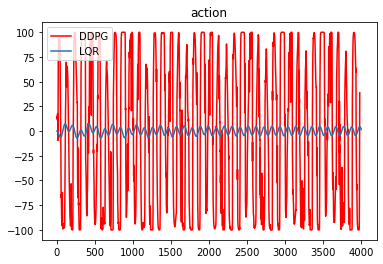

In [58]:
ep_reward = []
avg_reward = []
r = 0
rewa = []
J_vals = []
act = []
j = 0
vals = []
k = 0
A =np.array([[0 ,0 ,1 ,0 ],
              [0 ,0 ,0 ,1 ],
              [-Ks/M, Ks/M, 0, 0],
              [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
# Input matrix (Control force and Earthquake input)
B  = np.array([[0,0,1/M,-1/m]]).T
# Influence vector (Earthquake input)
E = np.array([[0,0,0,Kt/m]]).T 
# Output matrix (Disp + Accel)
Cd = np.array([[1, 1, 0, 0], [-Ks/M, Ks/M, 0, 0], [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
Dd = np.array([[0, 1/M, -1/m]]).T
Ed = np.array([[0, 0, 0]]).T
Qp = np.array([[Ks, -Ks, 0, 0],
               [-Ks, Ks+Kt, 0, 0],
               [0, 0, M, 0],
               [0, 0, 0, m]])
# print(Qp)
(i,j)=B.shape
Rp =  (10**(0))*np.identity(j)
Kp1, Sp1, ep1 = ct.lqr(A, B, Qp, Rp)
del i, j

T = 40
dt = 0.01

nt = len(env.t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
U = np.zeros([nt, 6])
for ep in range(6):
    prev_state = env.reset()
    env.amplitude = 0.5*(np.sin((ep+1)*env.t))
    episodic_reward = 0
    vals.append([])
    #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
    for time in range(0,len(env.t)-20):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state)
        state, reward, done, info = env.step(action)
         
        episodic_reward += reward
         
        prev_state = state

    ep_reward.append(episodic_reward)
    J_vals.append(env.J_val)
    act.append(env.en) 
    vals[ep].append(env.values)
    #avg_reward = np.mean(ep_reward_list[-40:])
    print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
    print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
   
    amplitude = env.amplitude
    t = env.t
    sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
    t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
    x_uc[:, :, k] = x1
    y_uc[:, :, k] = y1[:, 1:3]
    del t1, y1, x1

    sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
    t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
    x_c[:, :, k] = x2
    y_c[:, :, k] = y2[:, 1:3]
    del t2, y2, x2
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_c[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
    print(J1_val[k], J2_val[k])
    k = k+1
    plt.figure()
    plt.plot(vals[-1][0][0],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    plt.legend()
    plt.title('y1')
    plt.show()
    plt.figure()
    plt.plot(values[-1][0][1],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][2],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y1d')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][3],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2d')
    plt.show()
    plt.figure()
    plt.plot(act[-1],'r',label='DDPG')
    plt.plot(U[:, k-1] ,label = "LQR")
    
    plt.legend()
    plt.title('action')
    plt.show()



 
    
    


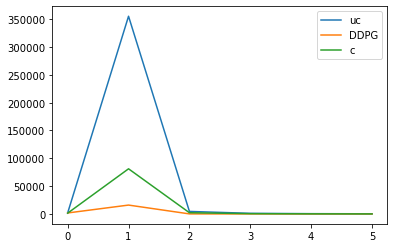

In [59]:
plt.figure()
plt.plot(J1_val,label="uc")
plt.plot(J_vals,label="DDPG")
plt.plot(J2_val,label="c")
plt.legend()
plt.show()

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 0 * Reward is ==> -2565.536037537198
Episode * 0 * J_value is ==> 289.2268342864297
[7782.7031303] [1467.67144813]


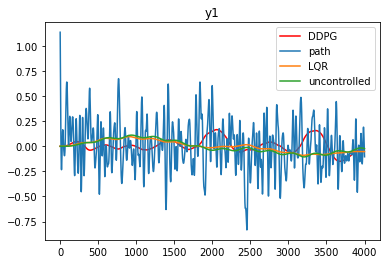

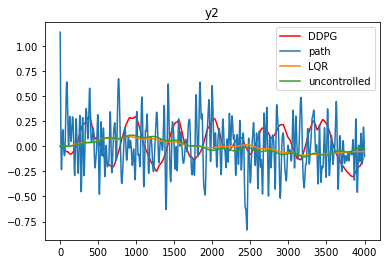

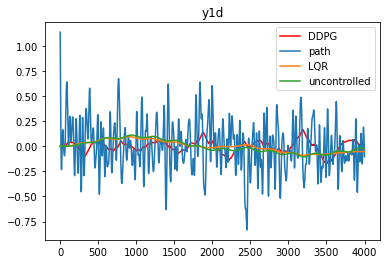

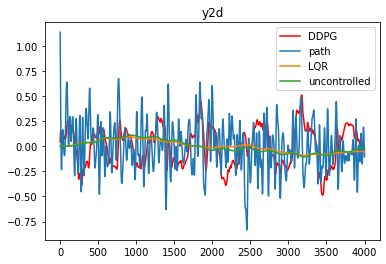

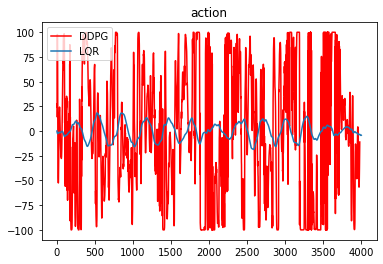

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 1 * Reward is ==> -2198.630401341583
Episode * 1 * J_value is ==> 246.85923989604487
[3469.29324872] [807.07513267]


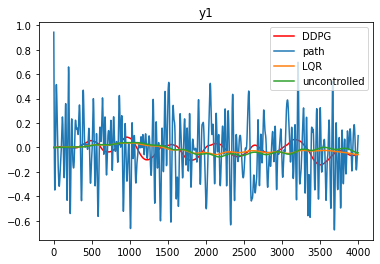

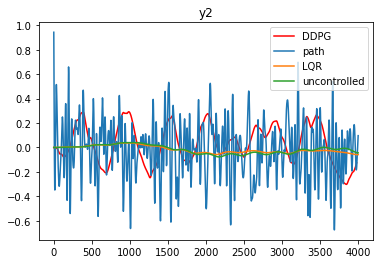

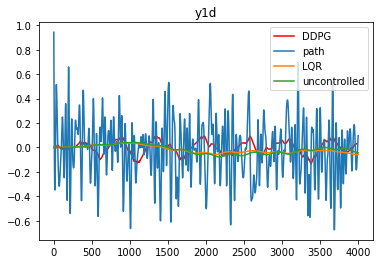

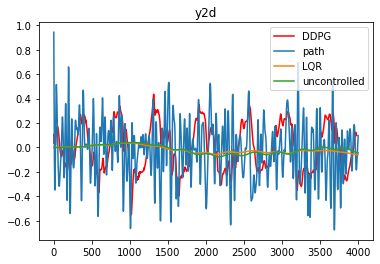

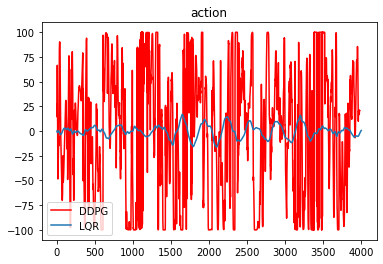

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 2 * Reward is ==> -2288.5302339144205
Episode * 2 * J_value is ==> 258.261710390327
[2440.53405306] [710.39788364]


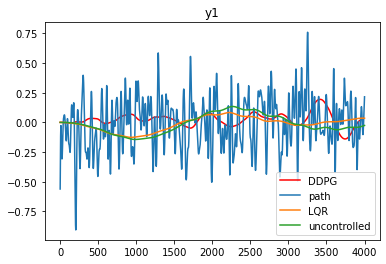

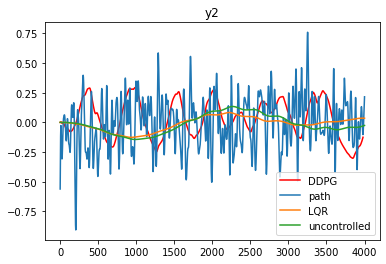

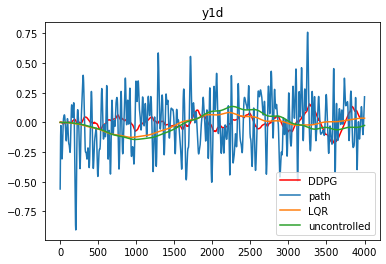

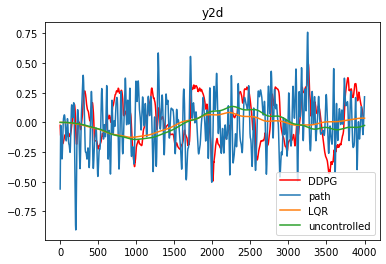

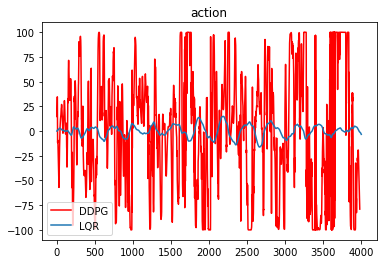

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 3 * Reward is ==> -1840.7055562270184
Episode * 3 * J_value is ==> 207.24806204724882
[3953.64666802] [2238.29925158]


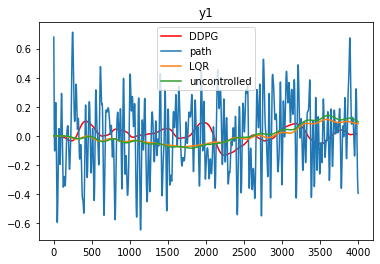

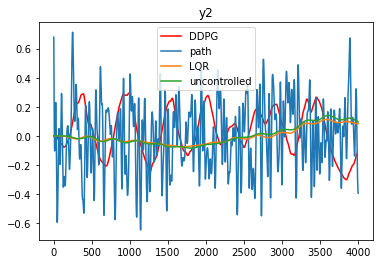

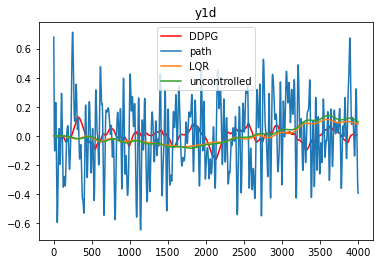

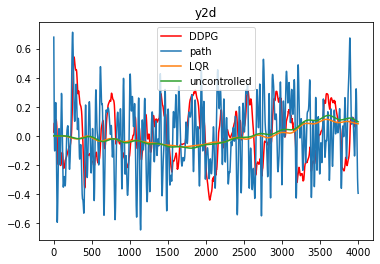

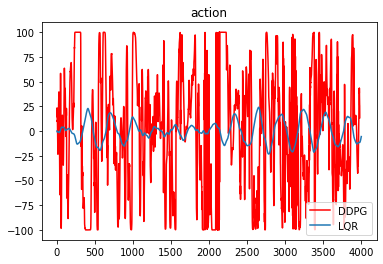

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 4 * Reward is ==> -2926.3829483871154
Episode * 4 * J_value is ==> 329.531820681901
[12473.00000051] [1909.27734295]


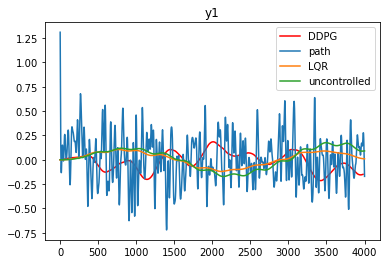

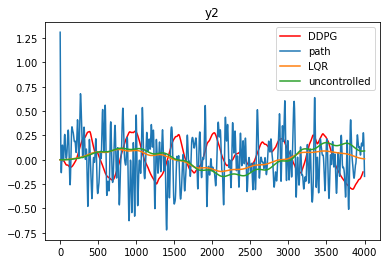

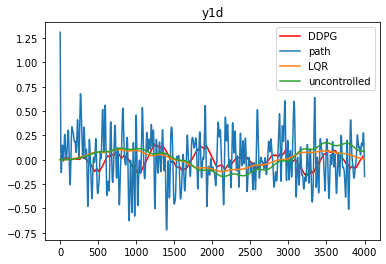

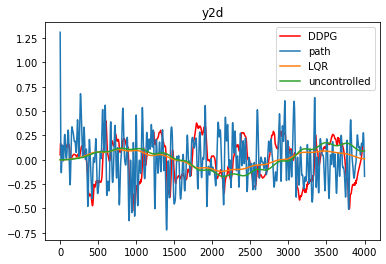

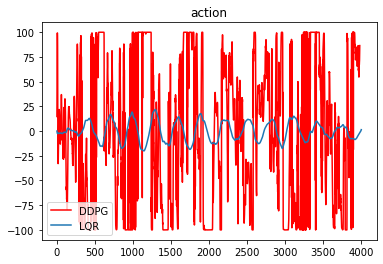

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 5 * Reward is ==> -3447.9713490932145
Episode * 5 * J_value is ==> 387.40480889639383
[1686.3992589] [814.63505924]


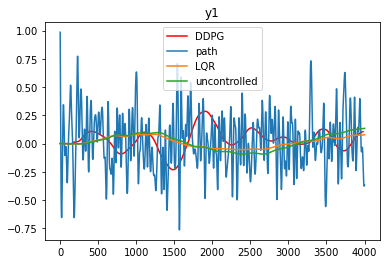

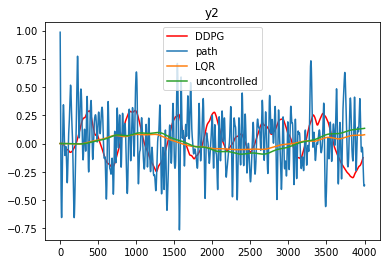

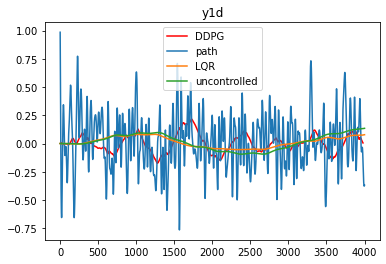

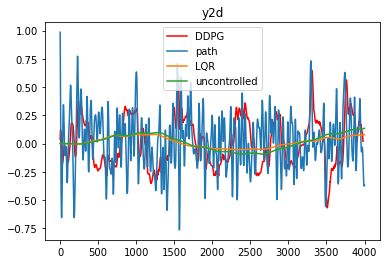

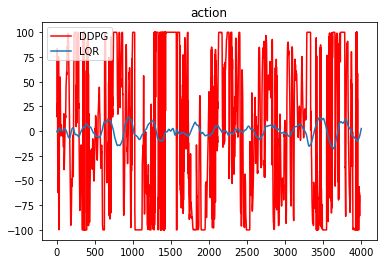

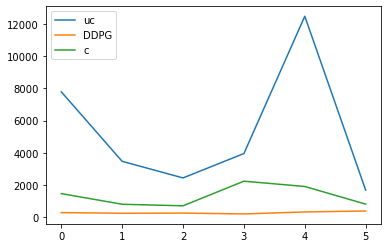

In [57]:
 ep_reward = []
avg_reward = []
r = 0
rewa = []
J_vals = []
act = []
j = 0
vals = []
k = 0
A =np.array([[0 ,0 ,1 ,0 ],
              [0 ,0 ,0 ,1 ],
              [-Ks/M, Ks/M, 0, 0],
              [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
# Input matrix (Control force and Earthquake input)
B  = np.array([[0,0,1/M,-1/m]]).T
# Influence vector (Earthquake input)
E = np.array([[0,0,0,Kt/m]]).T 
# Output matrix (Disp + Accel)
Cd = np.array([[1, 1, 0, 0], [-Ks/M, Ks/M, 0, 0], [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
Dd = np.array([[0, 1/M, -1/m]]).T
Ed = np.array([[0, 0, 0]]).T
Qp = np.array([[Ks, -Ks, 0, 0],
               [-Ks, Ks+Kt, 0, 0],
               [0, 0, M, 0],
               [0, 0, 0, m]])
# print(Qp)
(i,j)=B.shape
Rp =  (10**(0))*np.identity(j)
Kp1, Sp1, ep1 = ct.lqr(A, B, Qp, Rp)
del i, j

T = 40
dt = 0.01

nt = len(env.t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
U = np.zeros([nt, 6])
for ep in range(6):
    prev_state = env.reset()
    episodic_reward = 0
    vals.append([])
    #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
    for time in range(0,len(env.t)-20):
        env.time_current = time
        tf_prev_state = tf.expand_dims(tf.convert_to_tensor(prev_state), 0)
        action = policy(tf_prev_state)
        state, reward, done, info = env.step(action)
         
        episodic_reward += reward
         
        prev_state = state

    ep_reward.append(episodic_reward)
    J_vals.append(env.J_val)
    act.append(env.en) 
    vals[ep].append(env.values)
    #avg_reward = np.mean(ep_reward_list[-40:])
    print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
    print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
   
    amplitude = env.amplitude
    t = env.t
    sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
    t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
    x_uc[:, :, k] = x1
    y_uc[:, :, k] = y1[:, 1:3]
    del t1, y1, x1

    sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
    t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
    x_c[:, :, k] = x2
    y_c[:, :, k] = y2[:, 1:3]
    del t2, y2, x2
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_c[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
    print(J1_val[k], J2_val[k])
    k = k+1
    plt.figure()
    plt.plot(vals[-1][0][0],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    plt.legend()
    plt.title('y1')
    plt.show()
    plt.figure()
    plt.plot(values[-1][0][1],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][2],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y1d')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][3],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2d')
    plt.show()
    plt.figure()
    plt.plot(act[-1],'r',label='DDPG')
    plt.plot(U[:, k-1] ,label = "LQR")
    
    plt.legend()
    plt.title('action')
    plt.show()
    
plt.figure()
plt.plot(J1_val,label="uc")
plt.plot(J_vals,label="DDPG")
plt.plot(J2_val,label="c")
plt.legend()
plt.show()

In [ ]:
plt.plot(x_uc[:,0], 'r', label='Open Loop')
plt.plot(x_c[:,0], 'b', label='Optimal control')
plt.plot(ep_State_list[:,0,0],label='episode 0')
plt.plot(ep_State_list[:,0,499], label='episode 499')

plt.legend()
plt.show()

In [ ]:
plt.plot(x_uc[:,1], 'r', label='Open Loop')
plt.plot(x_c[:,1], 'b', label='Optimal control')
plt.plot(ep_State_list[:,1,0],label='episode 0')
plt.plot(ep_State_list[:,1,499], label='episode 499')

plt.legend()
plt.show()

In [ ]:
plt.plot(x_uc[:,2], 'r', label='Open Loop')
plt.plot(x_c[:,2], 'b', label='Optimal control')
plt.plot(ep_State_list[:,2,0],label='episode 0')
plt.plot(ep_State_list[:,2,499], label='episode 499')

plt.legend()
plt.show()

In [ ]:
plt.plot(x_uc[:,3], 'r', label='Open Loop')
plt.plot(x_c[:,3], 'b', label='Optimal control')
plt.plot(ep_State_list[:,3,0],label='episode 0')
plt.plot(ep_State_list[:,3,499], label='episode 499')

plt.legend()
plt.show()

In [ ]:
plt.plot(ep_reward_list)


In [ ]:

plt.plot(values[30][0][0],label='episode 100')
plt.plot(values[99][0][0],label='episode ')
 
plt.legend()
plt.show()

In [ ]:
plt.plot(env.hr)

In [ ]:
plt.plot(J_values)

In [ ]:
plt.plot(ep_reward_list)


In [ ]:
plt.plot(actions[149])

In [ ]:
plt.plot(actions[145])

In [ ]:
plt.plot(actions[141])

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 0 * Reward is ==> -16967.03769560118
Episode * 0 * J_value is ==> 1930.9580211430173
[1932.66537349]


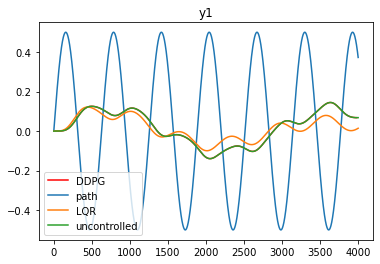

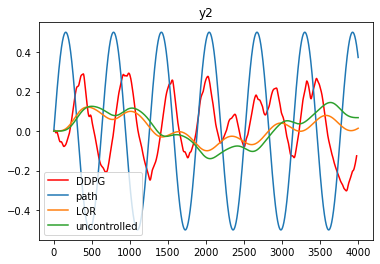

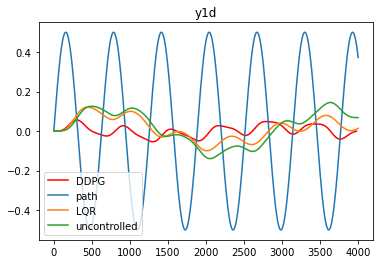

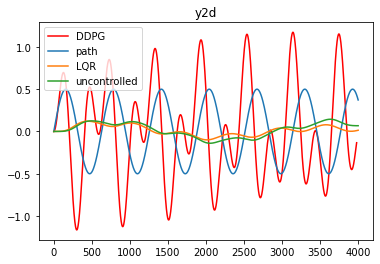

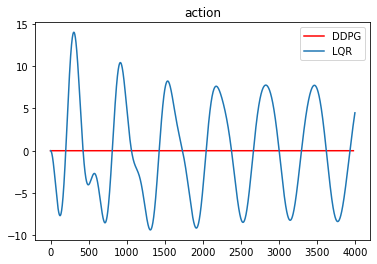

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 1 * Reward is ==> -3105722.279522457
Episode * 1 * J_value is ==> 352741.27936870465
[355278.00285061]


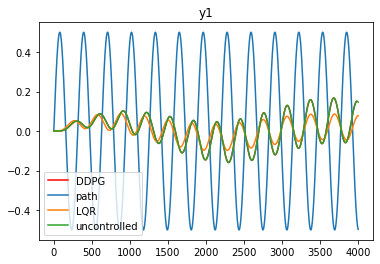

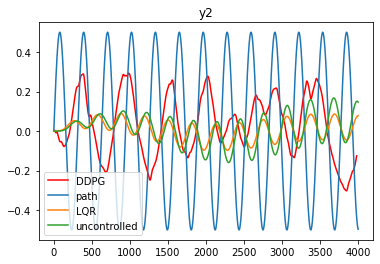

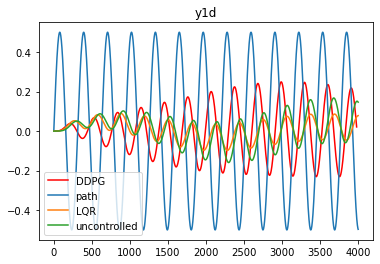

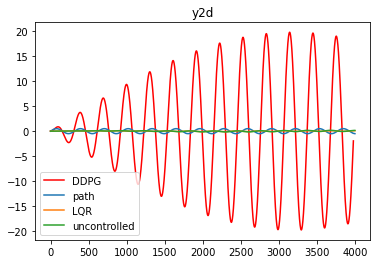

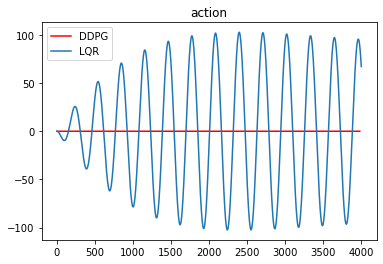

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 2 * Reward is ==> -40052.03093711025
Episode * 2 * J_value is ==> 4549.669204266506
[4579.43989228]


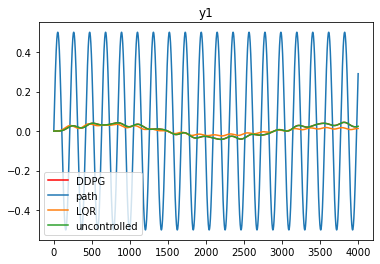

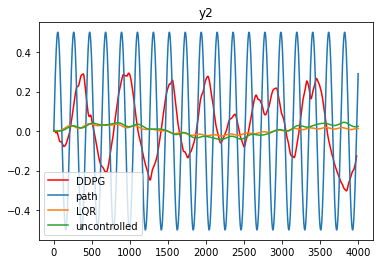

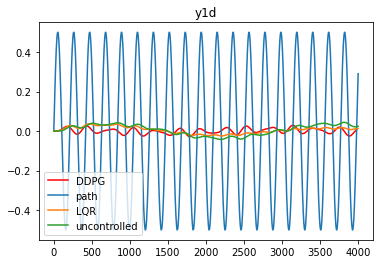

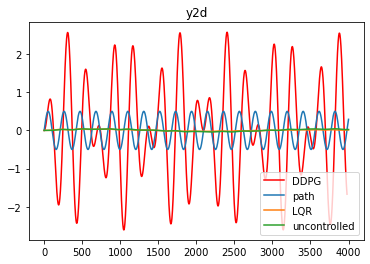

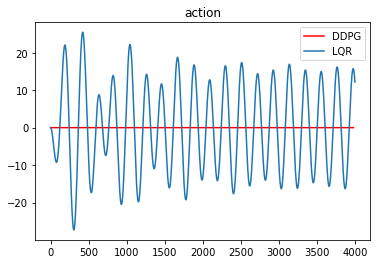

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 3 * Reward is ==> -10186.230467057596
Episode * 3 * J_value is ==> 1159.1546436431802
[1160.58225138]


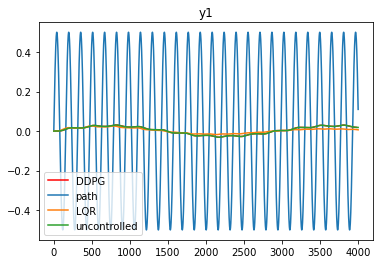

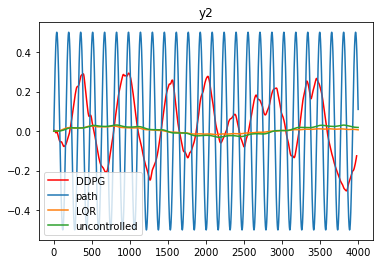

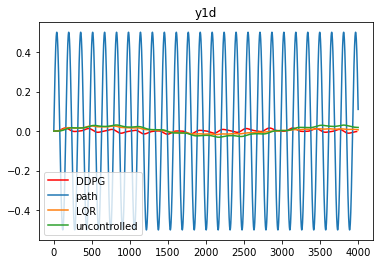

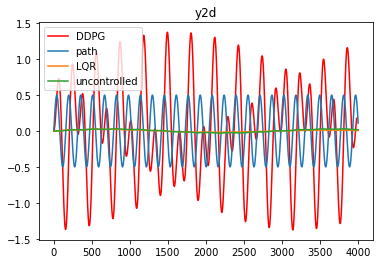

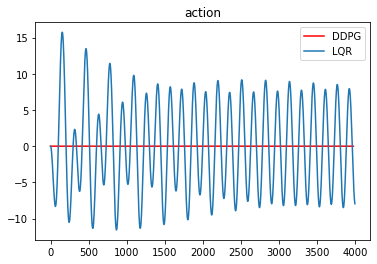

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 4 * Reward is ==> -4893.732188070612
Episode * 4 * J_value is ==> 556.0788040801124
[559.47790629]


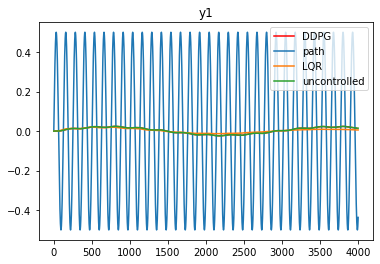

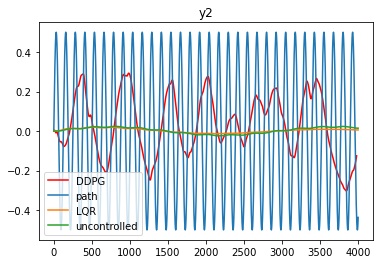

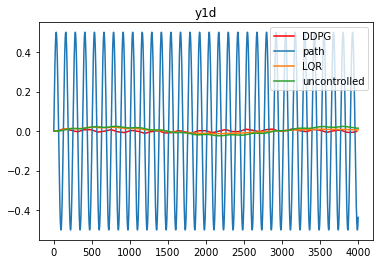

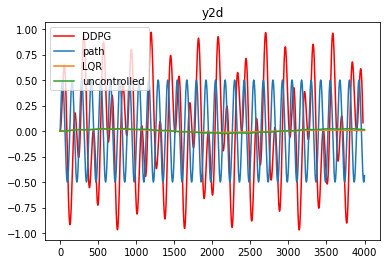

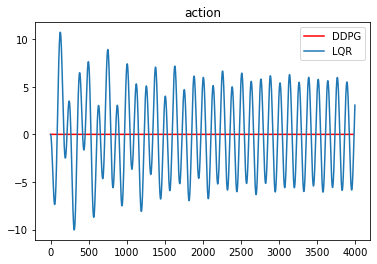

/home/user/anaconda3/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Episode * 5 * Reward is ==> -2971.113953487632
Episode * 5 * J_value is ==> 337.472941441331
[339.41114327]


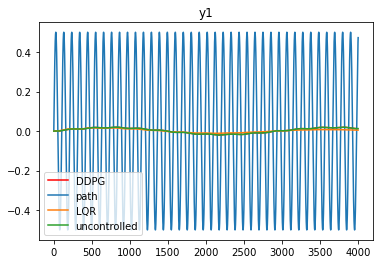

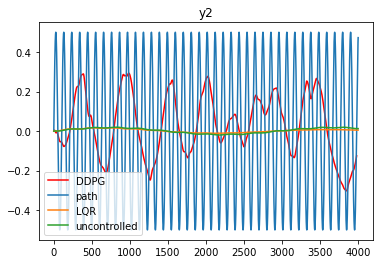

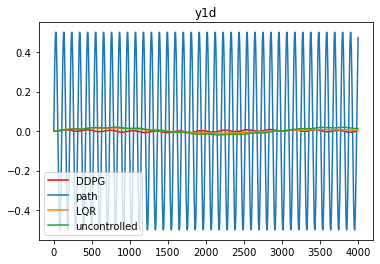

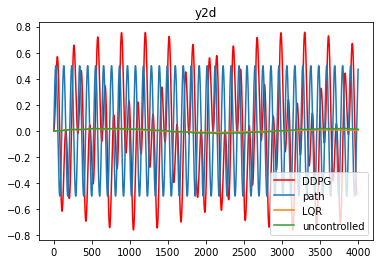

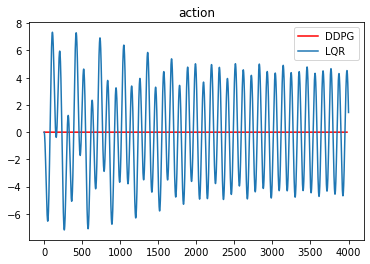

In [60]:
ep_reward = []
avg_reward = []
r = 0
rewa = []
J_vals = []
act = []
j = 0
vals = []
k = 0
A =np.array([[0 ,0 ,1 ,0 ],
              [0 ,0 ,0 ,1 ],
              [-Ks/M, Ks/M, 0, 0],
              [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
# Input matrix (Control force and Earthquake input)
B  = np.array([[0,0,1/M,-1/m]]).T
# Influence vector (Earthquake input)
E = np.array([[0,0,0,Kt/m]]).T 
# Output matrix (Disp + Accel)
Cd = np.array([[1, 1, 0, 0], [-Ks/M, Ks/M, 0, 0], [Ks/m, -1*(Ks+Kt)/m, 0, 0]])
Dd = np.array([[0, 1/M, -1/m]]).T
Ed = np.array([[0, 0, 0]]).T
Qp = np.array([[Ks, -Ks, 0, 0],
               [-Ks, Ks+Kt, 0, 0],
               [0, 0, M, 0],
               [0, 0, 0, m]])
# print(Qp)
(i,j)=B.shape
Rp =  (10**(0))*np.identity(j)
Kp1, Sp1, ep1 = ct.lqr(A, B, Qp, Rp)
del i, j

T = 40
dt = 0.01

nt = len(env.t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
U = np.zeros([nt, 6])
for ep in range(6):
    prev_state = env.reset()
    env.amplitude = 0.5*(np.sin((ep+1)*env.t))
    episodic_reward = 0
    vals.append([])
    #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
    for time in range(0,len(env.t)-20):
        env.time_current = time
        state, reward, done, info = env.step(0)
        episodic_reward += reward
        prev_state = state

    ep_reward.append(episodic_reward)
    J_vals.append(env.J_val)
    act.append(env.en) 
    vals[ep].append(env.values)
    #avg_reward = np.mean(ep_reward_list[-40:])
    print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
    print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
   
    amplitude = env.amplitude
    t = env.t
    sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
    t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
    x_uc[:, :, k] = x1
    y_uc[:, :, k] = y1[:, 1:3]
    del t1, y1, x1

    sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
    t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
    x_c[:, :, k] = x2
    y_c[:, :, k] = y2[:, 1:3]
    del t2, y2, x2
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_c[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
    print(J1_val[k])
    k = k+1
    plt.figure()
    plt.plot(vals[-1][0][0],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    plt.legend()
    plt.title('y1')
    plt.show()
    plt.figure()
    plt.plot(values[-1][0][1],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][2],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y1d')
    plt.show()
    plt.figure()
    plt.plot(vals[-1][0][3],'r',label='DDPG')
    plt.plot(env.amplitude,label="path")
    plt.plot(x_c[:,0,k-1] ,label = "LQR")
    plt.plot(x_uc[:,0,k-1] ,label = "uncontrolled")
    
    plt.legend()
    plt.title('y2d')
    plt.show()
    plt.figure()
    plt.plot(act[-1],'r',label='DDPG')
    plt.plot(U[:, k-1] ,label = "LQR")
    
    plt.legend()
    plt.title('action')
    plt.show()



 
    
    


In [61]:
print(J1_val)
print(J2_val)

[[1.93266537e+03]
 [3.55278003e+05]
 [4.57943989e+03]
 [1.16058225e+03]
 [5.59477906e+02]
 [3.39411143e+02]]
[[ 1482.24797511]
 [81167.19340064]
 [ 2267.99088354]
 [  560.93397823]
 [  260.64595677]
 [  154.15134819]]


In [67]:
T = 40
dt = 0.01
t = np.arange(0, T+dt, dt)
nt = len(t)
x_uc = np.zeros([nt, 2*n, 6])
y_uc = np.zeros([nt, n, 6])
x_c = np.zeros([nt, 2*n, 6])
y_c = np.zeros([nt, n, 6])
J1_val = np.zeros([6, 1])
J2_val = np.zeros([6, 1])
U = np.zeros([nt, 6])


# Input Sinusoid (Resonant Frequencies)
k = 0
for i in range(1, 3):
    for j in range(0, 3):
        omega1 = i
        omega2 = j/10
        amplitude = (np.sin(omega1*t) + np.sin(omega2*t))
        prev_state = env.reset()
        env.amplitude = amplitude
        episodic_reward = 0
        #print("omega1: ",env.omega1, "omega2: ",env.omega2/10)
        for time in range(0,len(env.t)-20):
            env.time_current = time
            state, reward, done, info = env.step(0)
            episodic_reward += reward
            prev_state = state
        #avg_reward = np.mean(ep_reward_list[-40:])
        #print("Episode * {} * Reward is ==> {}".format(ep, episodic_reward))
        print("Episode * {} * J_value is ==> {}".format(ep, env.J_val))
        
        
        # Openloop
        sys_uc = signal.StateSpace(A, E, Cd, np.array([[0, 0, 0]]).T)
        t1,y1,x1 = signal.lsim(sys_uc,amplitude,t)
        x_uc[:, :, k] = x1
        y_uc[:, :, k] = y1[:, 1:3]
        del t1, y1, x1

        sys_c = signal.StateSpace(A-B@Kp1, E, Cd-Dd@Kp1, np.array([[0, 0, 0]]).T)
        t2,y2,x2 = signal.lsim(sys_c,amplitude,t)
        x_c[:, :, k] = x2
        y_c[:, :, k] = y2[:, 1:3]
        del t2, y2, x2
        k = k+1
del i, j, k
for k in range(0, 6):
    for tkk in range(0,len(t)):
        U[tkk, k] = Kp1@x_uc[tkk,:,k].T
        En1 = 0.5*((x_uc[tkk,:,k]@Qp)@x_uc[tkk,:,k].T)
        En2 = 0.5*((x_c[tkk,:,k]@Qp)@x_c[tkk,:,k].T)
        J1 = dt*En1
        J2 = dt*En2
        J1_val[k] += J1 
        J2_val[k] += J2
print(J1_val)

Episode * 5 * J_value is ==> 7723.832084572069
Episode * 5 * J_value is ==> 10957.371114684805
Episode * 5 * J_value is ==> 14536.907347173945
Episode * 5 * J_value is ==> 1410965.1174748186
Episode * 5 * J_value is ==> 1420417.1785713143
Episode * 5 * J_value is ==> 1430186.6930603595
[[   7730.66149397]
 [  10964.3944059 ]
 [  14641.84077091]
 [1421112.01140244]
 [1431401.70678702]
 [1439467.14511079]]
